<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

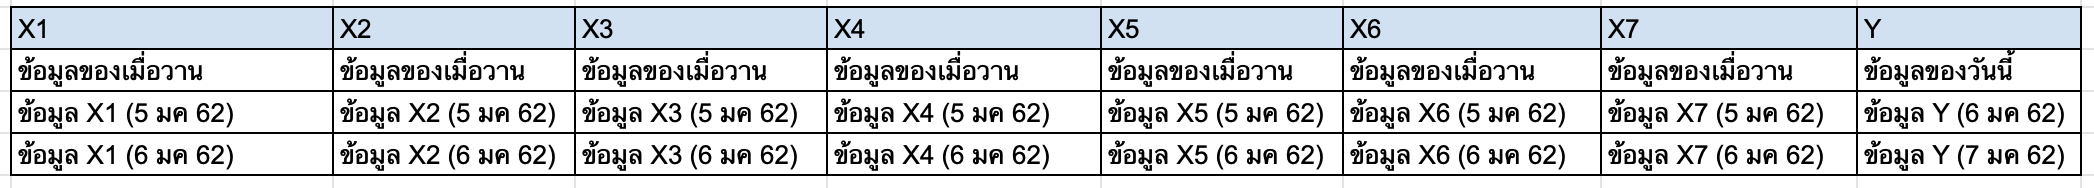

In [1859]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1860]:
import numpy as np
import pandas as pd
import os

##นำเข้าข้อมูล

In [1861]:
#ข้อมูลตัวเเปร X1 = อุณหภูมิตุ้มแห้ง(เซสเซียส)
Dry_temp_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dry_temp_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dry_temp_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dry_temp_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dry_temp_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [1862]:
#ข้อมูลตัวเเปร X2 = อุณหภูมิต่ำสุด(เซสเซียส)
Lowest_temp_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Lowest_temp_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Lowest_temp_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
Lowest_temp_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Lowest_temp_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)

In [1863]:
#ข้อมูลตัวเเปร X3 = อุณหภูมิจุดน้ำค้าง(เซสเซียส)
DewPoint_temp_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DewPoint_temp_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DewPoint_temp_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
DewPoint_temp_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
DewPoint_temp_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [1864]:
#ข้อมูลตัวเเปร X4 = จำนวนเมฆ(10 ส่วน)
clouds_amount_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4)
clouds_amount_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
clouds_amount_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
clouds_amount_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
clouds_amount_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)

In [1865]:
#ข้อมูลตัวเเปร X5 = ความเร็วลม(นอต)
wind_speed_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
wind_speed_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
wind_speed_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
wind_speed_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
wind_speed_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)

In [1866]:
#ข้อมูลตัวเเปร X6 = ความชื้นสัมพัทธ์(เปอร์เซ็น)
humidity_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
humidity_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
humidity_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
humidity_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
humidity_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

In [1867]:
#ข้อมูลตัวเเปร X7 = ความกด(เปอร์เซ็น)
pressure_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
pressure_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
pressure_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
pressure_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
pressure_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

In [1868]:
#ข้อมูลตัวเเปร Y = ปริมาณฝน(มิลลิเมตร)
Rainfall_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rainfall_Nakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rainfall_Sakon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rainfall_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rainfall_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_Data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

##เรียกดูข้อมูล ว่ามีอะไรที่ต้องเเก้ไขในเเต่ละชุดข้อมูล

###อุณหภูมิตุ้มแห้ง(เซสเซียส)

In [1869]:
Dry_temp_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [1870]:
Dry_temp_KhonKaen.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,25.154545,25.352727,25.449091,25.414545,25.450909,25.456364,25.676364,25.707273,25.432727,25.294545,...,25.238182,25.520000,25.847273,25.738182,25.521818,25.543636,25.521818,25.640000,25.756364,25.460000
std,2.575153,2.448798,2.351743,2.273879,2.226846,2.367665,2.479394,2.400683,2.489091,2.615723,...,3.074416,2.944386,2.750209,2.675506,2.774333,3.085135,3.003621,2.624712,2.492415,1.729761
min,18.100000,17.800000,19.400000,19.400000,19.700000,17.400000,17.700000,18.100000,18.400000,19.800000,...,16.300000,17.900000,17.900000,17.300000,15.200000,12.500000,13.400000,17.800000,17.900000,20.900000
25%,23.600000,23.950000,24.350000,23.950000,24.050000,24.300000,25.000000,24.650000,24.150000,23.350000,...,23.400000,24.250000,24.850000,24.350000,24.200000,24.550000,24.700000,24.450000,24.050000,24.350000
50%,25.600000,25.600000,25.600000,25.700000,25.900000,25.900000,26.300000,26.100000,25.500000,25.700000,...,26.100000,26.000000,26.600000,26.200000,26.000000,26.100000,26.100000,25.800000,26.000000,25.800000
75%,27.150000,27.000000,27.350000,27.100000,27.050000,27.150000,27.200000,27.150000,27.150000,27.500000,...,27.700000,27.750000,27.600000,27.450000,27.400000,27.350000,27.500000,27.500000,27.350000,26.600000
max,29.300000,29.800000,29.800000,28.800000,29.100000,29.400000,29.600000,29.800000,29.700000,29.800000,...,29.800000,30.100000,30.200000,30.300000,30.300000,30.200000,29.700000,31.000000,31.000000,28.700000


In [1871]:
Dry_temp_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [1872]:
Dry_temp_Nakhon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,24.781818,24.838182,24.767273,24.872727,24.918182,24.983636,25.320000,25.247273,24.898182,24.549091,...,24.440000,24.850909,25.090909,24.890909,24.676364,24.703636,24.883636,25.012727,25.029091,24.801818
std,3.163630,2.971936,2.830329,2.677164,2.688528,2.809360,2.766827,2.781410,2.839176,2.816083,...,3.378012,3.261951,2.989690,2.906523,3.046064,3.170347,2.955081,2.900067,2.798721,2.102070
min,17.600000,17.900000,17.700000,17.900000,17.700000,17.400000,17.600000,17.200000,17.500000,17.900000,...,16.600000,16.800000,16.800000,18.300000,14.000000,13.700000,15.900000,16.800000,17.000000,19.800000
25%,22.650000,23.150000,23.450000,23.150000,23.200000,23.300000,24.450000,23.900000,23.050000,22.500000,...,22.500000,23.000000,23.700000,23.250000,22.850000,22.950000,23.250000,23.100000,22.800000,23.300000
50%,25.000000,25.200000,25.000000,25.200000,25.500000,25.300000,26.100000,26.000000,24.900000,24.800000,...,25.000000,25.500000,25.500000,25.300000,25.100000,25.500000,25.300000,25.100000,25.100000,25.000000
75%,27.200000,27.300000,27.050000,27.100000,27.300000,27.250000,27.400000,27.300000,27.100000,26.850000,...,27.450000,27.400000,27.000000,27.100000,26.750000,27.100000,27.000000,27.050000,27.400000,26.550000
max,30.800000,29.300000,29.600000,29.200000,29.400000,28.600000,28.800000,29.200000,29.700000,29.700000,...,28.900000,29.200000,29.900000,30.300000,29.900000,29.000000,29.300000,30.200000,29.900000,28.200000


In [1873]:
Dry_temp_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [1874]:
Dry_temp_Sakon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,24.370909,24.507273,24.441818,24.572727,24.614545,24.654545,24.952727,24.927273,24.570909,24.269091,...,24.081818,24.460000,24.749091,24.554545,24.372727,24.369091,24.450909,24.629091,24.770909,24.460000
std,3.151347,2.967719,2.824476,2.654657,2.742223,2.945230,2.839787,2.851475,3.024815,2.925360,...,3.501486,3.359652,3.035279,2.961720,3.120865,3.268926,3.167478,2.842122,2.828209,2.130867
min,16.500000,17.200000,17.400000,17.400000,17.500000,16.500000,16.400000,17.100000,17.000000,17.100000,...,15.900000,16.100000,16.800000,16.400000,13.700000,13.100000,13.400000,16.700000,16.300000,19.200000
25%,22.250000,22.600000,23.150000,22.950000,22.750000,23.450000,24.000000,23.750000,22.700000,21.950000,...,21.950000,22.950000,23.350000,22.900000,22.550000,23.250000,23.050000,22.950000,22.650000,22.750000
50%,25.000000,24.800000,24.600000,24.900000,24.700000,25.100000,25.600000,25.600000,24.800000,25.000000,...,24.800000,25.100000,25.200000,24.800000,25.000000,25.300000,24.800000,24.600000,24.600000,24.700000
75%,26.900000,27.300000,26.700000,26.600000,26.850000,27.050000,27.000000,27.050000,26.750000,26.550000,...,27.000000,27.050000,26.850000,26.550000,26.450000,26.600000,26.650000,27.100000,27.000000,26.150000
max,29.500000,29.300000,29.500000,28.900000,29.100000,28.200000,29.000000,28.900000,29.800000,29.300000,...,28.800000,29.200000,29.800000,30.000000,29.600000,28.600000,29.000000,30.000000,30.400000,27.900000


In [1875]:
Dry_temp_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [1876]:
Dry_temp_NongKhai.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,25.230909,25.458182,25.518182,25.481818,25.372727,25.465455,25.716364,25.792727,25.300000,25.178182,...,25.105455,25.416364,25.545455,25.570909,25.278182,25.243636,25.280000,25.321818,25.609091,25.367273
std,2.927891,2.874904,2.842735,2.558942,2.588754,2.626377,2.658861,2.748390,2.939136,2.948615,...,3.429956,3.211655,2.972766,2.906868,2.904511,3.266993,3.212326,2.887437,2.779040,2.087445
min,18.000000,17.500000,19.400000,18.900000,19.500000,17.800000,17.900000,17.100000,17.500000,18.600000,...,16.400000,17.600000,16.800000,16.600000,15.100000,12.300000,11.800000,15.400000,17.000000,20.300000
25%,23.450000,23.850000,23.700000,24.150000,23.400000,24.300000,24.600000,24.400000,23.850000,23.350000,...,23.000000,23.500000,24.150000,23.850000,23.700000,23.950000,24.200000,24.100000,23.750000,23.750000
50%,25.600000,25.700000,26.000000,25.700000,25.800000,25.800000,26.200000,26.300000,25.400000,25.400000,...,25.800000,26.000000,26.300000,25.700000,25.800000,26.100000,25.900000,25.600000,25.600000,25.600000
75%,27.700000,27.950000,27.750000,27.200000,27.400000,27.450000,27.800000,27.700000,27.250000,27.700000,...,28.200000,27.800000,27.650000,27.700000,27.400000,27.400000,27.300000,27.150000,27.500000,26.900000
max,30.200000,30.700000,30.700000,29.800000,29.900000,29.200000,29.900000,29.900000,30.700000,29.800000,...,29.600000,29.800000,30.000000,30.900000,31.000000,30.300000,29.700000,30.400000,30.700000,29.200000


In [1877]:
Dry_temp_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


In [1878]:
Dry_temp_Loei.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.246000,24.356000,24.260000,24.388000,24.338000,24.320000,24.430000,24.498000,24.112000,24.002000,...,24.020000,24.116000,24.316000,24.566000,24.228000,24.190000,24.188000,24.132000,24.446000,24.246000
std,2.589083,2.572076,2.430252,2.226156,2.151401,2.382933,2.418656,2.511158,2.695699,2.768665,...,3.253256,2.938996,2.845717,2.826883,2.766346,3.250824,3.123096,2.967129,2.690437,1.967513
min,18.000000,16.800000,18.000000,19.100000,18.300000,17.200000,16.000000,15.800000,15.100000,16.800000,...,14.900000,15.600000,15.500000,14.600000,15.900000,12.000000,12.100000,13.900000,15.200000,19.100000
25%,22.600000,22.950000,22.975000,23.200000,23.075000,23.025000,23.600000,23.650000,23.225000,22.325000,...,22.200000,23.225000,23.625000,24.125000,23.375000,22.950000,23.300000,23.100000,22.975000,22.950000
50%,24.400000,24.750000,24.650000,24.550000,24.700000,25.000000,25.200000,25.300000,24.550000,24.350000,...,24.800000,24.600000,25.050000,25.200000,24.600000,24.800000,24.450000,24.500000,24.700000,24.750000
75%,26.375000,26.275000,25.950000,25.900000,25.900000,26.300000,25.900000,26.000000,25.975000,26.050000,...,26.675000,26.175000,26.150000,26.200000,25.875000,26.275000,26.175000,25.600000,26.400000,25.500000
max,28.900000,29.000000,29.100000,27.700000,27.500000,27.600000,27.800000,27.900000,28.100000,28.400000,...,28.900000,28.100000,27.900000,28.800000,29.800000,29.000000,28.400000,29.600000,29.000000,27.700000


In [1879]:
Dry_temp_Loei

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4
5,3,353201-เลย จ.เลย,2012-10-01,26.4,26.9,25.3,25.9,26.6,26.3,26.3,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.7
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,6,353201-เลย จ.เลย,2013-01-01,19.5,22.2,23.8,23.2,22.2,21.6,21.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24,21.5,22.9
9,7,353201-เลย จ.เลย,2013-02-01,22.3,23.4,23.8,25.9,25.9,26.9,27.4,...,25.2,24.7,26.1,28.4,29.6,29.0,-,-,-,26.4


พบว่า ในทุกตารางข้อมูลคอลัมน์ "ที่" มีเลขที่ซ้ำกัน 1 2 3 เเละจังหวัดเลยมีข้อมูลเเค่ 50 Rows

###อุณหภูมิต่ำสุด(เซสเซียส)

In [1880]:
Lowest_temp_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [1881]:
Lowest_temp_KhonKaen.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,25,26,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,20.478182,20.510909,20.390909,20.490909,20.598182,20.463636,20.729091,20.885455,20.858182,20.301818,20.465455,20.361818,20.294545,20.498182,20.683636,20.754545,20.605455,20.258182,20.290909,20.450909
std,3.285078,3.183969,3.096430,2.929876,2.908767,2.928934,3.139808,3.133358,3.146585,3.129637,3.225145,3.369058,3.375424,3.164589,2.852144,2.699370,2.725084,3.319175,3.002177,2.266738
min,11.900000,11.600000,14.000000,14.000000,13.100000,11.700000,11.100000,10.300000,12.000000,13.200000,12.200000,11.200000,10.600000,11.600000,12.000000,11.800000,13.700000,9.500000,10.000000,15.200000
25%,18.200000,18.150000,18.100000,18.450000,18.250000,18.600000,19.400000,19.050000,19.150000,18.300000,18.050000,18.000000,18.500000,18.450000,19.350000,19.600000,18.650000,19.050000,19.150000,19.100000
50%,21.200000,20.600000,20.600000,20.800000,21.300000,21.100000,21.800000,21.500000,21.000000,20.400000,20.700000,21.100000,20.300000,21.300000,20.800000,21.000000,21.100000,20.900000,21.000000,20.400000
75%,23.100000,23.200000,22.900000,22.750000,23.150000,22.650000,23.100000,23.150000,23.600000,22.950000,23.150000,23.000000,23.050000,22.650000,22.950000,22.500000,22.600000,22.650000,21.900000,22.250000
max,26.400000,25.200000,25.400000,25.200000,24.800000,24.200000,25.000000,25.500000,25.100000,25.400000,26.000000,25.200000,25.000000,24.500000,24.800000,25.100000,25.500000,25.600000,24.500000,24.100000


In [1882]:
Lowest_temp_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [1883]:
Lowest_temp_Nakhon.describe()

,1,2,3,4,6,7,8,9,10,12,13,14,15,20,24,26,27,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,19.801818,19.545455,19.492727,19.710909,19.778182,20.321818,20.341818,20.154545,19.450909,19.630909,19.643636,19.247273,19.914545,19.101818,19.261818,19.565455,19.749091,19.656364
std,3.965242,3.866466,3.746398,3.377961,3.428297,3.659826,3.687300,3.651373,3.431600,3.297410,3.628272,3.727766,3.481827,3.687943,3.315312,3.201459,3.197387,2.523281
min,11.000000,10.500000,11.200000,11.700000,12.200000,11.800000,8.200000,11.000000,11.600000,12.700000,9.500000,8.700000,9.400000,11.000000,10.900000,11.600000,10.400000,14.300000
25%,16.900000,16.950000,17.750000,17.400000,17.600000,18.200000,19.100000,17.950000,17.100000,17.250000,17.450000,16.650000,17.750000,16.600000,16.950000,17.900000,18.100000,18.000000
50%,20.600000,19.600000,19.600000,20.400000,20.400000,21.400000,21.200000,20.900000,19.300000,20.100000,20.200000,20.500000,20.400000,20.000000,19.200000,20.000000,19.700000,19.500000
75%,23.050000,22.900000,22.200000,22.000000,22.400000,23.150000,23.000000,23.000000,22.600000,22.000000,22.600000,22.150000,22.700000,22.200000,21.700000,22.000000,22.450000,21.800000
max,26.500000,25.400000,25.700000,25.500000,25.200000,25.700000,25.200000,26.000000,26.000000,25.500000,25.600000,24.600000,25.100000,25.400000,25.600000,24.800000,24.700000,24.300000


In [1884]:
Lowest_temp_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [1885]:
Lowest_temp_Sakon

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,22.5,23.1,23.7,24.8,25.1,23.8,23.5,...,22.5,23.0,22.6,23.0,21.5,24.4,25.2,24.7,22.8,23.4
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,19.0,20.0,20.6,22.3,22.4,22.0,23.0,...,25.4,25.5,24.5,23.5,22.9,22.4,24.7,22.4,-,22.9
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,24.4,23.5,22.0,22.5,23.4,19.5,19.7,...,20.4,14.8,14.8,19.5,19.9,19.8,19.5,21.3,14,20.0
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.9,15.4,18.9,15.6,16.5,16.5,16.0,...,19.8,19.3,21.0,21.2,20.9,18.5,15.9,18.2,21.7,17.4
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,20.3,20.0,21.0,20.4,19.5,21.4,...,17.1,16.8,19.7,22.0,23.6,24.1,-,-,-,20.3


In [1886]:
Lowest_temp_Sakon.describe()

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,22,23,24,25,26,27,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,19.663636,19.576364,19.418182,19.627273,19.720000,19.536364,20.076364,20.058182,19.969091,19.452727,...,19.250909,19.036364,18.865455,19.661818,19.574545,19.310909,19.185455,19.387273,19.520000,19.476364
std,4.052039,3.854721,3.556168,3.402366,3.372459,3.547945,3.818763,3.696830,3.672968,3.532906,...,3.558551,3.965049,3.928256,3.531472,3.615154,3.372529,3.579852,3.213228,3.114328,2.657621
min,10.600000,10.000000,12.700000,11.500000,11.000000,11.400000,9.800000,8.000000,11.300000,11.400000,...,11.300000,8.800000,8.500000,10.800000,9.100000,11.100000,9.700000,10.100000,10.600000,13.900000
25%,16.550000,16.650000,17.350000,17.450000,17.100000,17.300000,17.200000,18.100000,18.200000,16.500000,...,16.650000,16.150000,16.000000,17.500000,17.550000,17.100000,17.550000,17.800000,17.500000,17.650000
50%,20.300000,19.700000,19.700000,19.900000,20.200000,20.000000,21.200000,20.300000,20.200000,20.000000,...,20.300000,20.200000,19.500000,19.800000,20.200000,19.300000,19.700000,19.500000,19.900000,19.500000
75%,22.850000,22.750000,22.350000,22.050000,22.400000,22.500000,23.000000,23.000000,22.750000,22.400000,...,21.850000,22.000000,22.450000,22.250000,22.350000,22.050000,21.850000,21.700000,21.900000,21.650000
max,26.100000,25.600000,25.500000,25.700000,26.500000,25.600000,25.300000,25.500000,25.500000,25.800000,...,24.500000,25.000000,24.400000,25.200000,25.400000,25.500000,24.600000,24.400000,24.100000,24.300000


In [1887]:
Lowest_temp_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [1888]:
Lowest_temp_NongKhai.describe()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,20.360000,20.492727,20.447273,20.510909,20.503636,20.341818,20.569091,20.641818,20.572727,20.238182,...,20.063636,20.030909,20.127273,20.363636,20.263636,19.934545,19.969091,19.914545,20.130909,20.276364
std,3.704032,3.554697,3.718764,3.479872,3.248359,3.216663,3.462170,3.610411,3.637075,3.660626,...,3.765849,3.878902,3.832920,3.549510,3.483791,3.345435,3.374516,3.305518,3.006590,2.690585
min,12.000000,10.600000,10.900000,12.000000,12.500000,12.100000,10.600000,9.100000,10.800000,10.900000,...,11.000000,10.000000,10.300000,10.000000,9.600000,9.600000,10.500000,9.300000,12.100000,14.300000
25%,18.000000,18.600000,17.850000,18.250000,18.100000,18.200000,18.450000,18.700000,18.650000,17.500000,...,17.150000,17.250000,17.350000,18.000000,18.350000,17.600000,18.450000,18.750000,18.300000,18.800000
50%,20.700000,20.300000,20.200000,20.500000,20.700000,20.800000,21.200000,21.000000,20.600000,20.300000,...,20.800000,20.400000,20.500000,21.000000,20.800000,20.300000,20.300000,20.500000,20.600000,20.200000
75%,23.550000,23.600000,24.000000,23.600000,23.000000,22.450000,23.150000,23.600000,23.800000,23.600000,...,23.100000,23.050000,23.350000,23.000000,23.050000,22.550000,22.300000,22.200000,22.450000,22.150000
max,25.700000,25.600000,26.600000,26.000000,25.800000,25.900000,25.500000,26.000000,26.000000,26.300000,...,24.800000,25.300000,25.800000,25.800000,26.300000,26.700000,25.100000,25.300000,25.400000,24.800000


In [1889]:
Lowest_temp_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


In [1890]:
Lowest_temp_Loei.describe()

,2,3,4,5,6,7,8,9,10,11,...,19,20,21,22,23,24,25,26,27,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,19.156364,19.000000,18.823636,18.763636,18.630909,18.558182,18.849091,18.863636,18.727273,18.583636,...,18.465455,18.329091,18.154545,18.427273,18.523636,18.203636,18.276364,18.325455,18.323636,18.618182
std,3.702840,3.830095,3.567340,3.545647,3.598759,3.803297,4.028228,3.922979,3.754871,3.692072,...,3.650227,4.190274,4.117524,3.891465,3.873555,3.526774,3.743091,3.462563,3.443887,2.854307
min,9.000000,8.500000,10.500000,9.200000,8.600000,7.400000,6.500000,7.000000,8.400000,9.000000,...,8.700000,7.800000,7.000000,8.400000,5.500000,6.000000,7.500000,9.900000,9.000000,12.200000
25%,16.250000,16.350000,16.750000,16.550000,15.900000,15.750000,16.350000,16.050000,16.450000,15.650000,...,15.800000,16.000000,15.250000,16.700000,16.700000,16.050000,16.550000,16.650000,16.250000,16.650000
50%,19.500000,19.300000,19.500000,19.400000,19.400000,20.000000,20.500000,19.500000,19.000000,19.000000,...,19.000000,19.500000,19.000000,18.500000,19.000000,18.400000,18.000000,18.500000,19.000000,18.800000
75%,22.650000,22.450000,21.950000,21.500000,21.000000,21.300000,21.900000,22.250000,22.000000,21.550000,...,21.450000,21.750000,21.500000,21.500000,21.950000,21.250000,21.000000,21.000000,21.000000,20.600000
max,24.700000,24.500000,23.500000,24.400000,23.900000,24.000000,24.500000,24.000000,24.500000,24.100000,...,23.800000,24.100000,24.100000,23.900000,23.200000,23.500000,25.400000,23.300000,23.000000,23.000000


###อุณหภูมิจุดน้ำค้าง(เซสเซียส)

In [1891]:
DewPoint_temp_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [1892]:
DewPoint_temp_KhonKaen.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,18.647273,18.543636,18.281818,18.300000,18.314545,18.487273,18.700000,18.763636,18.696364,18.254545,...,17.998182,18.125455,18.241818,18.167273,17.776364,17.730909,17.823636,18.185455,18.285455,18.243459
std,4.211574,4.044189,3.857273,3.638783,3.598581,3.706204,3.959564,3.841121,3.712091,3.638214,...,4.262606,4.168676,3.827807,3.568382,3.461640,3.544055,3.155006,3.021676,2.874693,2.789502
min,9.100000,9.100000,9.700000,8.500000,9.300000,8.400000,8.200000,7.500000,10.800000,11.900000,...,4.400000,7.300000,7.900000,6.500000,6.700000,7.800000,9.700000,9.700000,10.500000,12.800000
25%,15.850000,16.200000,15.700000,16.000000,15.650000,16.650000,16.600000,16.200000,16.150000,15.200000,...,15.300000,15.500000,15.850000,16.200000,15.350000,16.300000,16.250000,16.150000,16.100000,16.352447
50%,18.500000,18.600000,18.000000,18.500000,18.400000,18.600000,19.100000,19.100000,19.100000,18.600000,...,18.700000,18.700000,19.100000,18.000000,17.700000,17.700000,18.300000,18.500000,18.800000,18.058065
75%,22.100000,21.700000,21.300000,21.150000,20.700000,21.250000,21.300000,21.550000,21.750000,21.250000,...,21.500000,21.450000,21.300000,20.850000,20.300000,20.250000,20.100000,20.400000,20.550000,20.383333
max,25.600000,25.200000,24.700000,24.600000,24.100000,24.600000,24.400000,24.900000,24.900000,24.700000,...,24.200000,25.100000,24.200000,24.300000,23.900000,24.000000,24.000000,23.800000,23.100000,23.351613


In [1893]:
DewPoint_temp_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [1894]:
DewPoint_temp_Nakhon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,17.758182,17.592727,17.563636,17.665455,17.836364,17.714545,18.143636,17.850909,17.543636,17.340000,...,17.101818,17.647273,17.823636,17.385455,17.187273,17.123636,17.281818,17.396364,17.585455,17.463895
std,4.271772,3.986731,3.797336,3.814457,4.041927,4.258256,4.341649,4.088642,3.768769,3.893518,...,4.293125,4.233283,3.814153,3.629479,3.687419,3.777760,3.422480,3.168477,3.187093,2.885293
min,8.500000,9.400000,7.500000,8.100000,7.700000,6.100000,3.500000,5.400000,8.300000,8.800000,...,2.800000,6.300000,6.600000,7.700000,6.700000,5.800000,8.800000,8.000000,9.700000,12.012903
25%,14.950000,15.300000,15.350000,14.700000,15.000000,15.300000,16.100000,15.550000,14.800000,14.300000,...,14.600000,15.200000,15.900000,14.550000,15.150000,15.200000,15.200000,15.300000,14.900000,15.460081
50%,17.700000,17.100000,17.600000,18.100000,18.700000,18.400000,18.100000,17.800000,17.500000,17.700000,...,18.000000,18.200000,18.500000,17.600000,17.600000,17.400000,17.600000,17.600000,17.900000,17.480645
75%,20.700000,20.600000,20.000000,20.000000,20.350000,20.750000,21.550000,21.100000,20.350000,20.250000,...,20.350000,21.250000,20.550000,20.250000,20.050000,19.650000,19.900000,19.650000,20.350000,19.966667
max,25.100000,24.700000,24.600000,24.900000,24.400000,24.500000,24.700000,24.200000,24.600000,24.800000,...,23.900000,24.200000,24.400000,24.600000,23.600000,24.000000,23.400000,22.700000,23.000000,22.790323


In [1895]:
DewPoint_temp_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [1896]:
DewPoint_temp_Sakon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,18.367273,18.254545,18.158182,18.267273,18.420000,18.336364,18.636364,18.445455,18.165455,18.061818,...,17.560000,18.090909,18.312727,17.952727,17.660000,17.612727,17.854545,18.092727,18.225455,18.034105
std,4.252496,3.980081,3.645936,3.545422,3.718941,3.926423,4.126354,4.007115,3.666981,3.791340,...,4.122908,4.081679,3.823129,3.367759,3.515447,3.670607,3.178447,2.981725,3.017125,2.773216
min,9.700000,10.700000,8.600000,9.000000,9.100000,7.400000,4.500000,4.900000,9.800000,10.300000,...,4.700000,7.400000,6.500000,8.600000,7.600000,5.800000,9.600000,9.200000,10.100000,12.317241
25%,15.350000,15.950000,16.250000,15.400000,15.800000,16.350000,17.250000,16.300000,15.600000,15.550000,...,14.550000,15.700000,16.850000,16.000000,15.750000,16.050000,16.050000,16.450000,16.600000,16.250000
50%,18.500000,18.000000,18.300000,18.700000,19.000000,18.400000,19.100000,18.200000,18.400000,18.100000,...,17.700000,18.600000,18.900000,17.700000,17.900000,17.800000,18.300000,18.500000,18.600000,17.721429
75%,21.900000,21.700000,20.850000,20.450000,20.700000,21.050000,21.200000,21.550000,21.150000,20.900000,...,20.900000,21.600000,21.150000,20.500000,20.450000,20.600000,19.850000,20.000000,20.800000,20.408333
max,25.400000,25.100000,25.100000,24.900000,24.500000,24.600000,24.600000,24.400000,24.500000,24.800000,...,24.000000,25.000000,24.600000,24.400000,23.700000,23.600000,23.100000,23.100000,23.200000,23.067742


In [1897]:
DewPoint_temp_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [1898]:
DewPoint_temp_NongKhai.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,18.881818,18.861818,18.923636,18.738182,18.860000,18.720000,18.934545,18.943636,18.785455,18.685455,...,18.272727,18.634545,18.872727,18.676364,18.285455,18.254545,18.329091,18.472727,18.816364,18.634847
std,4.052712,3.885657,3.665149,3.621054,3.757294,3.895553,4.209743,3.916478,3.739995,3.715055,...,4.219815,4.098248,3.685982,3.421661,3.493402,3.676946,3.282201,2.951237,2.740084,2.727392
min,9.100000,8.600000,10.100000,10.400000,7.900000,6.600000,4.900000,6.300000,7.700000,10.000000,...,3.500000,7.600000,6.400000,6.900000,9.200000,4.800000,8.500000,9.900000,10.600000,13.500000
25%,16.050000,16.350000,16.900000,16.700000,16.350000,16.400000,16.750000,17.000000,16.550000,15.800000,...,15.900000,16.300000,16.800000,16.500000,16.200000,17.050000,16.950000,16.600000,16.800000,16.851613
50%,18.800000,18.800000,18.600000,18.600000,19.400000,19.400000,19.500000,19.000000,18.900000,19.200000,...,19.200000,19.100000,19.200000,18.700000,18.700000,18.700000,18.700000,18.600000,18.700000,18.607143
75%,22.650000,21.600000,22.000000,21.450000,21.550000,21.450000,21.800000,21.650000,21.150000,21.650000,...,21.550000,22.050000,21.600000,20.800000,20.750000,20.650000,20.350000,20.950000,20.800000,21.140000
max,24.900000,25.500000,25.200000,25.300000,25.300000,24.500000,24.800000,24.800000,25.200000,25.100000,...,24.600000,24.800000,24.800000,25.000000,25.200000,24.100000,24.500000,24.600000,24.100000,23.909677


In [1899]:
DewPoint_temp_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


In [1900]:
DewPoint_temp_Loei.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,18.738000,18.878000,18.78000,18.638000,18.648000,18.580000,18.750000,18.712000,18.55400,18.32600,...,17.950000,18.210000,18.364000,18.342000,18.07800,17.980000,17.886000,18.140000,18.43600,18.343843
std,4.104596,3.987239,3.79683,3.702889,3.696233,3.924543,4.280676,4.549799,4.26271,4.13634,...,4.413118,4.231768,4.054967,3.820198,3.54368,3.878197,3.638457,3.434756,3.17996,3.264033
min,9.200000,8.400000,10.80000,11.000000,9.900000,8.900000,5.100000,2.800000,7.20000,8.30000,...,7.000000,8.000000,7.000000,6.500000,7.30000,5.900000,9.400000,10.000000,9.80000,12.961290
25%,16.200000,15.775000,15.95000,15.675000,15.575000,16.175000,16.800000,16.325000,15.60000,15.25000,...,14.450000,15.050000,15.550000,15.875000,15.92500,16.400000,15.725000,15.750000,16.07500,15.943520
50%,18.250000,19.150000,18.65000,18.650000,18.750000,19.000000,19.850000,19.650000,18.00000,18.25000,...,18.350000,18.600000,19.000000,18.700000,18.30000,18.350000,18.350000,18.550000,18.55000,17.909677
75%,22.000000,22.050000,21.82500,21.400000,21.550000,21.225000,21.675000,21.700000,21.95000,21.67500,...,21.200000,21.400000,21.275000,20.875000,20.57500,20.400000,19.875000,20.750000,20.95000,20.904167
max,27.600000,27.600000,26.20000,26.600000,26.900000,27.300000,27.800000,27.900000,28.10000,28.40000,...,27.100000,27.700000,26.700000,27.400000,25.80000,26.300000,26.600000,25.600000,25.20000,26.736667


เลยมีเเค่ 50 rows

###จำนวนเมฆ(10 ส่วน)

In [1901]:
clouds_amount_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [1902]:
clouds_amount_KhonKaen.describe()

,1,2,4,5,6,7,8,9,10,11,...,19,20,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3.454545,3.527273,3.527273,3.436364,3.363636,3.290909,3.327273,3.236364,2.927273,3.018182,...,3.236364,3.127273,3.236364,3.181818,3.327273,3.327273,3.490909,3.472727,3.290909,3.341078
std,1.772403,1.961241,1.751767,1.740196,2.093762,2.060859,1.826295,1.752920,1.399134,1.694117,...,1.655111,1.689341,1.655111,1.764788,1.633612,1.944170,1.513797,1.561748,1.383403,0.913437
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.800000
25%,2.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,2.000000,2.000000,2.606989
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.300000
75%,4.000000,4.000000,4.500000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.796552
max,9.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,9.000000,7.000000,9.000000,...,7.000000,8.000000,8.000000,9.000000,8.000000,10.000000,8.000000,7.000000,6.000000,6.322581


In [1903]:
clouds_amount_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [1904]:
clouds_amount_Nakhon.describe()

,11,12,16,17,26,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3.690909,3.763636,4.036364,3.727273,3.036364,3.090909,3.428891
std,2.924182,2.581728,2.867207,2.811712,2.395703,2.525959,1.145468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.357143
25%,1.000000,2.000000,2.000000,1.500000,2.000000,1.000000,2.762644
50%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.225806
75%,6.000000,5.000000,6.000000,5.000000,4.000000,5.000000,4.032258
max,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,7.322581


In [1905]:
clouds_amount_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [1906]:
clouds_amount_Sakon.describe()

,Unnamed: 34
count,55.000000
mean,2.848967
std,1.044219
min,0.882353
25%,2.228495
50%,2.758621
75%,3.413793
max,5.741935


In [1907]:
clouds_amount_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [1908]:
clouds_amount_NongKhai.describe()

,Unnamed: 34
count,55.000000
mean,3.352214
std,1.268318
min,1.000000
25%,2.506667
50%,3.200000
75%,4.229032
max,8.000000


In [1909]:
clouds_amount_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1910]:
clouds_amount_Loei.describe()

,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,55.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.234706,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0
std,1.275029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.875000,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0
25%,2.344086,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0
50%,3.161290,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0
75%,3.952151,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0
max,6.967742,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0


จังหวัดไม่ตรง ขึ้นจังหวัดเลยหมด

###ความเร็วลม(นอต)

In [1911]:
wind_speed_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [1912]:
wind_speed_KhonKaen.describe()

,1,2,4,5,6,7,8,9,10,11,...,19,20,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3.272727,3.254545,3.127273,3.181818,3.018182,3.000000,3.127273,2.981818,2.927273,3.054545,...,3.181818,3.109091,3.090909,3.072727,3.254545,3.381818,3.545455,3.600000,3.127273,3.201273
std,1.520898,1.745027,1.361570,1.362064,1.661000,1.427248,1.528186,1.239637,1.372407,1.660189,...,1.599663,1.583161,1.601767,1.708958,1.530168,1.870739,1.549411,1.485735,1.217991,0.738743
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.800000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.606989
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.161290
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.500000,4.000000,5.000000,4.000000,3.645161
max,7.000000,8.000000,7.000000,7.000000,9.000000,7.000000,9.000000,6.000000,6.000000,9.000000,...,7.000000,7.000000,8.000000,9.000000,7.000000,10.000000,8.000000,7.000000,6.000000,4.806452


In [1913]:
wind_speed_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [1914]:
wind_speed_Nakhon.describe()

,1,2,3,6,9,13,14,17,19,23,26,27,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2.109091,2.109091,2.145455,1.945455,2.290909,2.054545,1.836364,2.490909,2.145455,2.236364,1.963636,2.163636,2.100588
std,1.149440,1.227354,1.061414,1.129047,1.314770,1.208277,0.976836,1.620159,1.282621,1.154117,1.170053,1.049932,0.452786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.200000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.758065
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.142857
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.500000,3.000000,3.000000,3.000000,3.000000,2.409677
max,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000,6.000000,7.000000,5.000000,5.000000,5.000000,3.166667


In [1915]:
wind_speed_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [1916]:
wind_speed_Sakon.describe()

,1,2,3,5,6,7,8,9,10,11,...,19,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2.418182,2.418182,2.327273,2.400000,2.218182,1.945455,2.363636,2.527273,2.327273,2.381818,...,2.363636,2.163636,2.272727,2.400000,2.600000,2.436364,2.327273,2.490909,2.490909,2.398500
std,1.181507,1.100352,1.055050,1.226256,1.066161,0.970265,1.160518,1.033773,1.001010,1.340134,...,1.281834,1.101575,1.026583,1.270754,1.408966,1.243705,1.171491,1.136478,1.103408,0.474980
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.200000
25%,1.500000,2.000000,2.000000,1.000000,1.500000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.500000,1.000000,2.000000,1.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.112903
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.333333
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.790323
max,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000,6.000000,5.000000,6.000000,7.000000,...,7.000000,5.000000,5.000000,6.000000,7.000000,7.000000,5.000000,7.000000,5.000000,3.200000


In [1917]:
wind_speed_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [1918]:
wind_speed_NongKhai.describe()

,1,2,3,5,6,7,8,9,10,11,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2.600000,2.581818,2.472727,2.272727,2.490909,2.309091,2.527273,2.563636,2.363636,2.418182,...,2.581818,2.254545,2.381818,2.490909,2.763636,2.490909,2.472727,2.509091,2.490909,2.506618
std,1.299573,1.100352,0.978558,1.113129,1.289168,1.034099,1.152365,1.150904,1.144449,1.342895,...,1.396966,1.004032,0.971652,1.386078,1.794680,1.303453,1.152365,1.086495,1.069315,0.369739
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.580645
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.290323
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.466667
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.790323
max,6.000000,6.000000,6.000000,5.000000,8.000000,7.000000,6.000000,6.000000,6.000000,7.000000,...,9.000000,5.000000,5.000000,7.000000,11.000000,7.000000,5.000000,7.000000,5.000000,3.200000


In [1919]:
wind_speed_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


In [1920]:
wind_speed_Loei.describe()

,1,2,3,4,6,7,8,9,10,11,...,18,20,21,22,23,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1.690909,1.690909,1.527273,1.60000,1.727273,1.563636,1.709091,1.745455,1.654545,1.727273,...,1.836364,1.527273,1.654545,1.636364,1.727273,1.600000,1.672727,1.690909,1.690909,1.668103
std,0.690484,0.766733,0.920035,0.68313,0.848846,0.833636,0.657513,0.750757,0.725672,0.826742,...,0.976836,0.766293,0.672700,0.619547,0.731679,0.894427,0.610238,0.634581,0.766733,0.348631
min,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.161290
25%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.465476
50%,2.000000,2.000000,1.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.633333
75%,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.816667
max,3.000000,4.000000,6.000000,3.00000,5.000000,6.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,4.000000,4.000000,3.000000,4.000000,5.000000,3.000000,3.000000,4.000000,3.300000


จังหวัดไม่ตรง ขึ้นจังหวัดเลยหมด

###ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [1921]:
humidity_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [1922]:
humidity_KhonKaen.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,69.436364,68.309091,66.981818,66.963636,66.963636,67.690909,67.836364,67.945455,68.563636,67.400000,...,66.690909,66.181818,65.381818,65.400000,64.872727,64.563636,64.909091,65.600000,65.927273,66.690909
std,9.595067,9.073512,8.701832,8.954543,8.960745,9.384528,10.246524,10.405515,9.956877,9.038191,...,8.719652,9.337481,8.839078,8.891527,8.595982,8.166698,8.136049,8.451605,8.436812,6.806513
min,48.000000,52.000000,50.000000,49.000000,51.000000,52.000000,48.000000,47.000000,43.000000,46.000000,...,48.000000,49.000000,48.000000,49.000000,50.000000,48.000000,48.000000,43.000000,48.000000,55.000000
25%,62.500000,61.000000,61.000000,61.500000,61.500000,61.000000,61.000000,62.000000,62.000000,60.500000,...,61.500000,60.000000,58.000000,59.000000,59.500000,59.500000,59.000000,60.000000,61.000000,62.000000
50%,69.000000,67.000000,67.000000,66.000000,65.000000,68.000000,67.000000,66.000000,66.000000,66.000000,...,66.000000,67.000000,66.000000,64.000000,65.000000,65.000000,66.000000,66.000000,65.000000,66.000000
75%,73.500000,73.000000,70.500000,71.500000,70.500000,73.000000,72.500000,73.500000,75.500000,73.500000,...,71.500000,72.500000,72.500000,71.000000,69.500000,69.000000,71.000000,70.000000,70.000000,71.000000
max,91.000000,92.000000,91.000000,92.000000,86.000000,93.000000,93.000000,93.000000,94.000000,90.000000,...,89.000000,87.000000,86.000000,84.000000,85.000000,85.000000,88.000000,92.000000,91.000000,82.000000


In [1923]:
humidity_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [1924]:
humidity_Nakhon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,67.218182,66.309091,66.490909,66.763636,67.200000,66.745455,67.054545,66.181818,65.945455,66.436364,...,66.200000,66.709091,66.581818,65.618182,65.745455,65.309091,65.127273,64.927273,65.781818,66.072727
std,7.861512,6.618920,6.440246,7.156876,8.316427,8.915692,9.434802,8.954806,7.770834,7.873452,...,8.156797,7.634407,7.148403,6.439148,6.325194,5.925065,6.853100,6.820054,6.841299,4.841390
min,54.000000,54.000000,51.000000,50.000000,52.000000,42.000000,40.000000,49.000000,51.000000,52.000000,...,38.000000,48.000000,54.000000,53.000000,49.000000,50.000000,47.000000,51.000000,46.000000,57.000000
25%,61.000000,61.000000,63.000000,62.500000,61.500000,61.000000,61.000000,61.000000,60.000000,60.500000,...,62.000000,62.000000,62.000000,61.500000,62.000000,62.000000,61.000000,59.500000,61.500000,63.000000
50%,67.000000,65.000000,66.000000,67.000000,68.000000,68.000000,67.000000,64.000000,65.000000,66.000000,...,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,65.000000,65.000000
75%,70.500000,69.500000,70.000000,70.500000,72.000000,71.000000,72.000000,71.000000,70.000000,70.000000,...,71.000000,71.000000,71.000000,69.500000,69.000000,69.000000,69.000000,68.000000,70.500000,70.000000
max,95.000000,84.000000,86.000000,86.000000,87.000000,90.000000,87.000000,89.000000,86.000000,90.000000,...,90.000000,89.000000,87.000000,83.000000,86.000000,82.000000,90.000000,83.000000,82.000000,77.000000


In [1925]:
humidity_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [1926]:
humidity_Sakon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,71.254545,70.327273,70.127273,70.218182,70.690909,70.181818,70.381818,69.800000,69.781818,70.327273,...,69.272727,70.163636,69.854545,69.163636,68.600000,68.400000,68.927273,69.200000,69.200000,68.545455
std,7.180782,6.197534,5.751182,5.918242,6.488944,7.213904,8.501614,9.058248,7.847365,6.571697,...,7.369744,7.445515,7.846722,6.789872,6.087632,5.855039,6.076227,5.622047,5.860729,9.889797
min,57.000000,57.000000,57.000000,59.000000,60.000000,54.000000,49.000000,49.000000,48.000000,60.000000,...,51.000000,49.000000,55.000000,55.000000,53.000000,55.000000,57.000000,56.000000,52.000000,6.000000
25%,66.000000,66.500000,66.000000,67.000000,67.000000,67.000000,65.000000,66.000000,65.000000,66.000000,...,66.000000,66.000000,65.500000,64.500000,65.000000,65.500000,65.000000,66.000000,65.500000,66.500000
50%,70.000000,70.000000,70.000000,70.000000,70.000000,69.000000,71.000000,69.000000,69.000000,69.000000,...,70.000000,70.000000,70.000000,69.000000,67.000000,68.000000,69.000000,69.000000,70.000000,69.000000
75%,76.000000,73.500000,73.000000,73.000000,74.000000,74.000000,74.000000,74.000000,74.000000,72.500000,...,73.500000,74.000000,73.000000,73.000000,72.000000,73.000000,72.000000,71.500000,72.000000,73.000000
max,87.000000,88.000000,89.000000,89.000000,87.000000,90.000000,89.000000,93.000000,95.000000,93.000000,...,90.000000,90.000000,99.000000,88.000000,86.000000,82.000000,92.000000,85.000000,83.000000,82.000000


In [1927]:
humidity_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [1928]:
humidity_NongKhai.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,69.836364,69.054545,69.072727,68.545455,69.545455,68.672727,68.800000,68.309091,69.363636,69.490909,...,68.036364,68.436364,69.036364,68.200000,67.472727,67.490909,67.818182,68.109091,68.309091,68.527273
std,7.899282,7.072163,6.480325,6.975667,8.664141,8.096763,9.600154,7.475572,8.040093,7.752832,...,6.936120,7.195069,8.121676,6.963928,6.027267,6.097579,7.591640,7.780966,6.277156,4.598126
min,58.000000,58.000000,56.000000,55.000000,51.000000,47.000000,45.000000,52.000000,46.000000,49.000000,...,45.000000,53.000000,55.000000,52.000000,56.000000,53.000000,53.000000,52.000000,56.000000,57.000000
25%,64.000000,64.500000,66.000000,64.000000,65.000000,65.500000,65.000000,64.500000,66.000000,66.000000,...,63.500000,64.000000,65.000000,64.000000,63.500000,64.000000,62.500000,63.000000,64.000000,65.500000
50%,68.000000,68.000000,69.000000,68.000000,68.000000,68.000000,68.000000,68.000000,70.000000,70.000000,...,69.000000,69.000000,67.000000,67.000000,67.000000,68.000000,68.000000,67.000000,69.000000,68.000000
75%,74.000000,71.500000,72.500000,73.000000,72.500000,71.500000,72.000000,73.000000,73.000000,73.500000,...,72.500000,72.500000,73.000000,73.000000,71.000000,71.000000,72.000000,71.000000,71.000000,71.000000
max,89.000000,91.000000,91.000000,87.000000,92.000000,88.000000,90.000000,90.000000,94.000000,90.000000,...,90.000000,84.000000,90.000000,83.000000,86.000000,88.000000,92.000000,93.000000,88.000000,78.000000


In [1929]:
humidity_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


In [1930]:
humidity_Loei.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,79.818182,79.345455,80.072727,79.272727,78.872727,78.818182,78.436364,78.745455,79.145455,79.054545,...,78.327273,78.636364,78.600000,77.436364,77.090909,77.218182,77.127273,78.145455,77.909091,78.309091
std,7.671716,7.100386,7.254257,6.990614,7.645029,8.362374,9.390231,8.764867,8.047126,7.874991,...,7.303106,7.701283,8.010641,7.485204,7.884050,7.790523,8.288892,7.872639,7.369287,6.226802
min,64.000000,64.000000,65.000000,63.000000,62.000000,60.000000,47.000000,56.000000,59.000000,61.000000,...,63.000000,63.000000,61.000000,59.000000,62.000000,59.000000,55.000000,56.000000,58.000000,63.000000
25%,75.000000,74.000000,75.500000,74.000000,73.500000,73.000000,72.000000,72.500000,75.500000,73.500000,...,73.000000,73.000000,72.000000,72.000000,71.500000,72.000000,73.000000,74.000000,72.500000,74.000000
50%,80.000000,80.000000,80.000000,80.000000,79.000000,80.000000,79.000000,80.000000,79.000000,79.000000,...,79.000000,80.000000,79.000000,78.000000,77.000000,78.000000,77.000000,79.000000,79.000000,79.000000
75%,85.500000,84.000000,84.000000,84.000000,84.000000,85.000000,83.500000,84.000000,85.000000,84.500000,...,84.000000,84.000000,84.000000,83.000000,82.000000,82.000000,83.000000,82.500000,83.500000,83.000000
max,95.000000,95.000000,94.000000,95.000000,93.000000,94.000000,97.000000,96.000000,96.000000,96.000000,...,96.000000,94.000000,94.000000,90.000000,94.000000,97.000000,93.000000,97.000000,96.000000,89.000000


###ความกด(เปอร์เซ็น)

In [1931]:
pressure_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [1932]:
pressure_KhonKaen.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1013.129273,1012.987818,1012.742727,1012.520545,1012.255273,1012.079273,1011.899455,1012.089273,1012.194909,1012.117091,...,1012.921273,1012.777091,1012.638545,1012.520909,1012.719273,1012.671091,1012.596545,1012.595818,1012.536545,1012.641924
std,3.246429,3.035542,3.007046,2.808540,2.852173,3.035118,3.186643,3.110963,2.854105,2.857206,...,3.110676,3.111005,2.977719,2.695393,2.979411,3.308117,3.163194,2.943711,3.046761,1.861453
min,1005.470000,1006.210000,1006.130000,1005.610000,1006.280000,1005.930000,1004.610000,1003.830000,1004.250000,1003.030000,...,1004.780000,1005.680000,1006.990000,1005.750000,1005.460000,1004.800000,1004.280000,1005.450000,1005.960000,1008.360000
25%,1011.060000,1011.040000,1010.875000,1010.780000,1010.520000,1009.930000,1009.935000,1010.245000,1010.585000,1010.610000,...,1011.215000,1010.935000,1010.890000,1010.985000,1010.960000,1011.070000,1010.845000,1010.780000,1010.220000,1011.592124
50%,1012.810000,1012.920000,1012.600000,1012.890000,1012.190000,1011.890000,1011.540000,1011.640000,1011.790000,1012.100000,...,1012.620000,1012.000000,1012.250000,1012.470000,1012.300000,1012.350000,1012.350000,1012.370000,1012.530000,1012.456667
75%,1015.675000,1015.145000,1014.525000,1014.165000,1013.750000,1013.730000,1013.325000,1014.145000,1013.870000,1014.055000,...,1014.650000,1014.485000,1014.020000,1014.150000,1014.590000,1013.925000,1014.195000,1014.440000,1014.650000,1013.927118
max,1019.110000,1018.430000,1018.680000,1018.560000,1019.410000,1020.430000,1021.780000,1020.000000,1017.990000,1017.210000,...,1022.590000,1020.440000,1020.760000,1018.490000,1022.850000,1024.580000,1021.610000,1019.590000,1018.810000,1016.470000


In [1933]:
pressure_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [1934]:
pressure_Nakhon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1013.942364,1013.796545,1013.604182,1013.323818,1012.994727,1012.751818,1012.616545,1012.875636,1013.023091,1012.886909,...,1013.739273,1013.482909,1013.448182,1013.414909,1013.608909,1013.537091,1013.549091,1013.498182,1013.324727,1013.448823
std,3.557638,3.331316,3.279439,3.067816,3.083318,3.327107,3.471753,3.424784,3.173523,3.150695,...,3.296094,3.364225,3.233148,2.965492,3.344547,3.555244,3.322286,3.123293,3.281188,2.039534
min,1005.810000,1006.410000,1006.930000,1006.930000,1006.950000,1006.260000,1004.350000,1003.340000,1004.000000,1003.230000,...,1005.110000,1005.920000,1007.300000,1005.760000,1005.130000,1004.940000,1004.840000,1006.200000,1006.580000,1008.772258
25%,1011.645000,1011.235000,1011.565000,1011.330000,1010.930000,1010.515000,1010.360000,1010.805000,1010.980000,1011.290000,...,1011.820000,1011.365000,1011.580000,1011.750000,1011.445000,1011.585000,1011.715000,1011.480000,1010.705000,1012.178048
50%,1014.050000,1013.750000,1013.620000,1013.440000,1012.870000,1012.360000,1012.410000,1012.640000,1012.980000,1012.950000,...,1013.360000,1012.770000,1012.760000,1013.250000,1013.300000,1013.270000,1013.030000,1012.800000,1013.300000,1013.393333
75%,1016.530000,1016.100000,1015.780000,1015.205000,1014.795000,1014.155000,1014.400000,1015.230000,1015.045000,1015.040000,...,1015.425000,1015.500000,1014.810000,1014.655000,1015.310000,1014.735000,1015.330000,1015.820000,1015.800000,1015.094978
max,1020.650000,1019.750000,1020.340000,1020.010000,1021.500000,1021.800000,1023.330000,1021.010000,1019.260000,1019.420000,...,1023.820000,1021.940000,1022.040000,1020.240000,1025.300000,1025.710000,1022.450000,1020.880000,1020.070000,1017.133000


In [1935]:
pressure_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [1936]:
pressure_Sakon.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1013.719091,1013.585818,1013.359455,1013.101273,1012.744727,1012.562909,1012.378000,1012.639636,1012.773455,1012.654545,...,1013.525818,1013.286545,1013.197818,1013.178727,1013.347455,1013.287273,1013.300909,1013.235818,1013.105455,1013.219119
std,3.532594,3.297765,3.215528,3.014058,3.057851,3.331339,3.449851,3.396326,3.179290,3.172223,...,3.329534,3.415843,3.284841,3.037284,3.353213,3.566599,3.382553,3.113896,3.300136,2.048441
min,1005.190000,1006.070000,1006.760000,1006.640000,1006.440000,1005.740000,1003.880000,1003.030000,1003.210000,1002.070000,...,1004.430000,1005.190000,1006.710000,1005.730000,1005.040000,1004.960000,1003.950000,1005.150000,1006.700000,1008.357419
25%,1011.870000,1011.430000,1011.570000,1011.190000,1010.675000,1010.270000,1010.265000,1010.630000,1011.025000,1011.035000,...,1011.685000,1011.005000,1011.315000,1011.495000,1011.350000,1011.150000,1011.315000,1011.225000,1010.670000,1012.083995
50%,1013.490000,1013.600000,1013.500000,1013.410000,1012.560000,1012.250000,1012.250000,1012.380000,1012.630000,1012.630000,...,1012.940000,1012.730000,1012.740000,1012.830000,1013.200000,1013.140000,1013.070000,1012.760000,1012.970000,1012.874839
75%,1016.110000,1015.975000,1015.475000,1014.925000,1014.485000,1014.115000,1013.930000,1014.835000,1014.485000,1014.495000,...,1015.170000,1015.265000,1014.880000,1014.745000,1014.960000,1014.910000,1014.840000,1015.310000,1015.370000,1014.803962
max,1020.820000,1019.560000,1019.680000,1019.350000,1020.650000,1021.260000,1023.120000,1020.470000,1018.740000,1018.890000,...,1023.190000,1022.040000,1021.910000,1019.530000,1025.000000,1025.530000,1022.420000,1020.990000,1020.030000,1016.972000


In [1937]:
pressure_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [1938]:
pressure_NongKhai.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1013.510000,1013.369818,1013.080545,1012.883455,1012.649455,1012.441455,1012.266000,1012.394182,1012.561091,1012.409636,...,1013.251091,1013.046182,1013.015273,1012.873636,1013.074364,1013.030727,1013.045455,1013.054364,1012.921091,1012.977747
std,3.489791,3.215037,3.183433,2.988464,3.032600,3.179328,3.323991,3.327022,3.080191,3.090611,...,3.326916,3.375838,3.202527,2.973675,3.233020,3.537038,3.359361,3.108775,3.235081,1.945604
min,1005.330000,1006.130000,1006.740000,1006.270000,1006.650000,1005.890000,1004.300000,1002.910000,1003.110000,1002.040000,...,1004.340000,1005.120000,1006.680000,1005.890000,1005.540000,1005.280000,1004.170000,1005.160000,1006.660000,1008.443548
25%,1011.450000,1011.355000,1011.265000,1011.335000,1010.530000,1010.230000,1010.275000,1010.480000,1010.705000,1010.950000,...,1011.470000,1010.925000,1011.000000,1011.155000,1011.255000,1011.130000,1011.310000,1011.045000,1010.580000,1011.924107
50%,1013.330000,1013.260000,1012.960000,1012.960000,1012.500000,1012.290000,1012.160000,1012.080000,1012.180000,1012.400000,...,1012.810000,1012.430000,1012.530000,1012.610000,1012.810000,1012.670000,1012.940000,1012.500000,1012.940000,1012.759000
75%,1016.190000,1015.625000,1015.230000,1014.850000,1014.445000,1013.930000,1013.685000,1014.270000,1014.385000,1014.185000,...,1015.000000,1015.195000,1014.800000,1014.220000,1014.790000,1014.685000,1014.655000,1015.320000,1015.330000,1014.439602
max,1020.050000,1019.410000,1018.760000,1019.310000,1020.050000,1021.240000,1022.770000,1020.750000,1018.810000,1018.010000,...,1023.380000,1021.600000,1021.870000,1019.580000,1024.080000,1026.100000,1022.330000,1020.280000,1019.500000,1016.662258


In [1939]:
pressure_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [1940]:
pressure_Loei.describe()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,Unnamed: 34
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000
mean,1013.319636,1013.197636,1013.014545,1012.705091,1012.475636,1012.336182,1012.224000,1012.362909,1012.420000,1012.264182,...,1013.150182,1013.022364,1012.968909,1012.710364,1012.849273,1012.879273,1012.911818,1012.95000,1012.823636,1012.868311
std,3.394661,3.170435,3.072225,2.824489,2.877282,3.000176,3.150867,3.091701,2.828593,2.827081,...,3.166549,3.190456,3.045502,2.765604,2.961115,3.325199,3.291277,3.08463,3.076913,1.890534
min,1005.120000,1006.350000,1006.540000,1005.960000,1006.460000,1006.540000,1005.230000,1004.330000,1004.420000,1003.110000,...,1004.900000,1005.630000,1006.790000,1005.780000,1005.480000,1004.960000,1004.860000,1005.76000,1005.590000,1008.896452
25%,1010.950000,1010.980000,1011.045000,1011.465000,1010.545000,1010.390000,1010.125000,1010.655000,1010.665000,1010.905000,...,1011.605000,1011.240000,1010.930000,1011.155000,1011.110000,1011.235000,1010.970000,1010.90500,1010.300000,1011.895161
50%,1013.190000,1013.160000,1012.880000,1012.970000,1012.540000,1011.910000,1011.900000,1012.020000,1012.140000,1012.290000,...,1012.770000,1012.400000,1012.370000,1012.710000,1012.630000,1012.720000,1012.660000,1012.48000,1012.990000,1012.644333
75%,1015.750000,1015.260000,1015.100000,1014.520000,1014.420000,1013.600000,1013.580000,1013.690000,1014.290000,1014.035000,...,1014.940000,1015.150000,1014.390000,1013.780000,1014.450000,1014.450000,1014.595000,1014.79500,1015.250000,1014.333538
max,1019.510000,1019.270000,1019.490000,1019.060000,1020.120000,1021.210000,1021.740000,1020.800000,1018.840000,1017.340000,...,1023.730000,1021.330000,1021.190000,1019.410000,1022.370000,1025.270000,1022.450000,1019.45000,1018.600000,1016.470000


###ปริมาณฝน(มิลลิเมตร)

In [1941]:
Rainfall_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [1942]:
Rainfall_KhonKaen.describe()

<ipython-input-1942-45ab3db125cd>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rainfall_KhonKaen.describe()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
count,55,55,55,55,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55,55.0,55.0,55,55,55,55,55
unique,50,1,55,11,10.0,6.0,10.0,10.0,11.0,13.0,...,8.0,7.0,10,9.0,8.0,6,4,4,6,41
top,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-,0.0,0.0,-,-,-,-,-
freq,3,55,1,24,24.0,25.0,23.0,24.0,25.0,23.0,...,25.0,28.0,24,25.0,24.0,31,31,34,37,12
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1943]:
Rainfall_Nakhon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [1944]:
Rainfall_Nakhon.describe()

<ipython-input-1944-76be76514771>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rainfall_Nakhon.describe()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
count,55,55,55,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55,55
unique,50,1,55,10.0,6.0,5.0,10.0,11.0,11.0,12.0,...,8.0,6.0,8.0,8.0,5.0,9.0,4.0,5.0,7,36
top,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-
freq,3,55,1,40.0,48.0,44.0,41.0,34.0,35.0,40.0,...,43.0,47.0,40.0,43.0,45.0,38.0,40.0,34.0,30,8
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1945]:
Rainfall_Sakon.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [1946]:
Rainfall_Sakon.describe()

<ipython-input-1946-74421b894998>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rainfall_Sakon.describe()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
count,55,55,55,55.0,55.0,55.0,55,55.0,55.0,55.0,...,55.0,55.0,55.0,55,55.0,55,55,55,55,55
unique,50,1,55,9.0,5.0,6.0,8,10.0,8.0,12.0,...,7.0,6.0,7.0,9,7.0,7,7,5,4,42
top,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,0.0,0.0,0.0,-,0.0,0.0,0.0,...,0.0,0.0,0.0,-,0.0,-,-,-,-,-
freq,3,55,1,26.0,26.0,26.0,25,24.0,23.0,24.0,...,26.0,26.0,25.0,24,27.0,26,30,33,39,10
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1947]:
Rainfall_NongKhai.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [1948]:
Rainfall_NongKhai.describe()

<ipython-input-1948-d0a76935c299>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rainfall_NongKhai.describe()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
count,55,55,55,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55,55,55,55,55,55,55,55
unique,50,1,55,10.0,7.0,6.0,6.0,11.0,9.0,10.0,...,8.0,4.0,7,6,6,5,3,3,6,38
top,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-,-,-,-,-,-,-,-
freq,3,55,1,25.0,31.0,33.0,33.0,29.0,33.0,33.0,...,27.0,27.0,26,27,27,28,32,34,38,15
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1949]:
Rainfall_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


In [1950]:
Rainfall_Loei.describe()

<ipython-input-1950-b932dd3f25f1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rainfall_Loei.describe()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
count,55,55,55,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,55.0,54.0,54.0,55,55
unique,50,1,55,12.0,10.0,9.0,7.0,11.0,10.0,11.0,...,5.0,10.0,7.0,9.0,10.0,10.0,6.0,6.0,5,43
top,1,353201-เลย จ.เลย,2011-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-
freq,3,55,1,32.0,35.0,37.0,33.0,32.0,36.0,33.0,...,37.0,35.0,38.0,32.0,37.0,35.0,31.0,29.0,33,9
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#เตรียมข้อมูล / Data Preprocessing

##เปลี่ยนชื่อคอลัมน์ที่ขึ้น unnamed

In [1951]:
Name ={'Unnamed: 0':'ID','Unnamed: 1':'Station','Unnamed: 2':'Year-Month-Day','Unnamed: 34':'Mean'}

In [1952]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X1 = อุณหภูมิตุ้มแห้ง(เซสเซียส)
Dry_temp_KhonKaen = Dry_temp_KhonKaen.rename(columns=Name)
Dry_temp_Nakhon = Dry_temp_Nakhon.rename(columns=Name)
Dry_temp_Sakon = Dry_temp_Sakon.rename(columns=Name)
Dry_temp_NongKhai = Dry_temp_NongKhai.rename(columns=Name)
Dry_temp_Loei = Dry_temp_Loei.rename(columns=Name)

In [1953]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X2 = อุณหภูมิต่ำสุด(เซสเซียส)
Lowest_temp_KhonKaen = Lowest_temp_KhonKaen.rename(columns=Name)
Lowest_temp_Nakhon = Lowest_temp_Nakhon.rename(columns=Name)
Lowest_temp_Sakon = Lowest_temp_Sakon.rename(columns=Name)
Lowest_temp_NongKhai = Lowest_temp_NongKhai.rename(columns=Name)
Lowest_temp_Loei = Lowest_temp_Loei.rename(columns=Name)

In [1954]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X3 = อุณหภูมิจุดน้ำค้าง(เซสเซียส)
DewPoint_temp_KhonKaen = DewPoint_temp_KhonKaen.rename(columns=Name)
DewPoint_temp_Nakhon = DewPoint_temp_Nakhon.rename(columns=Name)
DewPoint_temp_Sakon = DewPoint_temp_Sakon.rename(columns=Name)
DewPoint_temp_NongKhai = DewPoint_temp_NongKhai.rename(columns=Name)
DewPoint_temp_Loei = DewPoint_temp_Loei.rename(columns=Name)

In [1955]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X4 = จำนวนเมฆ(10 ส่วน)
clouds_amount_KhonKaen = clouds_amount_KhonKaen.rename(columns=Name)
clouds_amount_Nakhon = clouds_amount_Nakhon.rename(columns=Name)
clouds_amount_Sakon = clouds_amount_Sakon.rename(columns=Name)
clouds_amount_NongKhai = clouds_amount_NongKhai.rename(columns=Name)
clouds_amount_Loei = clouds_amount_Loei.rename(columns=Name)

In [1956]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X5 = ความเร็วลม(นอต)
wind_speed_KhonKaen = wind_speed_KhonKaen.rename(columns=Name)
wind_speed_Nakhon = wind_speed_Nakhon.rename(columns=Name)
wind_speed_Sakon = wind_speed_Sakon.rename(columns=Name)
wind_speed_NongKhai = wind_speed_NongKhai.rename(columns=Name)
wind_speed_Loei = wind_speed_Loei.rename(columns=Name)

In [1957]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X6 = ความชื้นสัมพัทธ์(เปอร์เซ็น)
humidity_KhonKaen = humidity_KhonKaen.rename(columns=Name)
humidity_Nakhon = humidity_Nakhon.rename(columns=Name)
humidity_Sakon = humidity_Sakon.rename(columns=Name)
humidity_NongKhai = humidity_NongKhai.rename(columns=Name)
humidity_Loei = humidity_Loei.rename(columns=Name)

In [1958]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร X7 = ความกด(เปอร์เซ็น)
pressure_KhonKaen = pressure_KhonKaen.rename(columns=Name)
pressure_Nakhon = pressure_Nakhon.rename(columns=Name)
pressure_Sakon = pressure_Sakon.rename(columns=Name)
pressure_NongKhai = pressure_NongKhai.rename(columns=Name)
pressure_Loei = pressure_Loei.rename(columns=Name)

In [1959]:
#เปลี่ยนชื่อคอลัมน์ข้อมูลตัวเเปร Y = ปริมาณฝน(มิลลิเมตร)
Rainfall_KhonKaen = Rainfall_KhonKaen.rename(columns=Name)
Rainfall_Nakhon = Rainfall_Nakhon.rename(columns=Name)
Rainfall_Sakon = Rainfall_Sakon.rename(columns=Name)
Rainfall_NongKhai = Rainfall_NongKhai.rename(columns=Name)
Rainfall_Loei = Rainfall_Loei.rename(columns=Name)

In [1960]:
#Dry_temp_KhonKaen.head()

In [1961]:
#Rainfall_KhonKaen.head()

##ตรวจสอบว่าข้อมูลมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [1962]:
#อุณหภูมิตุ้มแห้ง(เซสเซียส)
Dry_temp_KhonKaen = Dry_temp_KhonKaen.replace('-',np.NaN)
Dry_temp_Nakhon = Dry_temp_Nakhon.replace('-',np.NaN)
Dry_temp_Sakon = Dry_temp_Sakon.replace('-',np.NaN)
Dry_temp_NongKhai = Dry_temp_NongKhai.replace('-',np.NaN)
Dry_temp_Loei = Dry_temp_Loei.replace('-',np.NaN)

#อุณหภูมิต่ำสุด(เซสเซียส)
Lowest_temp_KhonKaen = Lowest_temp_KhonKaen.replace('-',np.NaN)
Lowest_temp_Nakhon = Lowest_temp_Nakhon.replace('-',np.NaN)
Lowest_temp_Sakon = Lowest_temp_Sakon.replace('-',np.NaN)
Lowest_temp_NongKhai = Lowest_temp_NongKhai.replace('-',np.NaN)
Lowest_temp_Loei = Lowest_temp_Loei.replace('-',np.NaN)

#อุณหภูมิจุดน้ำค้าง(เซสเซียส)
DewPoint_temp_KhonKaen = DewPoint_temp_KhonKaen.replace('-',np.NaN)
DewPoint_temp_Nakhon = DewPoint_temp_Nakhon.replace('-',np.NaN)
DewPoint_temp_Sakon = DewPoint_temp_Sakon.replace('-',np.NaN)
DewPoint_temp_NongKhai = DewPoint_temp_NongKhai.replace('-',np.NaN)
DewPoint_temp_Loei = DewPoint_temp_Loei.replace('-',np.NaN)

#จำนวนเมฆ(10 ส่วน)
clouds_amount_KhonKaen = clouds_amount_KhonKaen.replace('-',np.NaN)
clouds_amount_Nakhon = clouds_amount_Nakhon.replace('-',np.NaN)
clouds_amount_Sakon = clouds_amount_Sakon.replace('-',np.NaN)
clouds_amount_NongKhai = clouds_amount_NongKhai.replace('-',np.NaN)
clouds_amount_Loei = clouds_amount_Loei.replace('-',np.NaN)

#ความเร็วลม(นอต)
wind_speed_KhonKaen = wind_speed_KhonKaen.replace('-',np.NaN)
wind_speed_Nakhon = wind_speed_Nakhon.replace('-',np.NaN)
wind_speed_Sakon = wind_speed_Sakon.replace('-',np.NaN)
wind_speed_NongKhai = wind_speed_NongKhai.replace('-',np.NaN)
wind_speed_Loei = wind_speed_Loei.replace('-',np.NaN)

#ความชื้นสัมพัทธ์(เปอร์เซ็น)
humidity_KhonKaen = humidity_KhonKaen.replace('-',np.NaN)
humidity_Nakhon = humidity_Nakhon.replace('-',np.NaN)
humidity_Sakon = humidity_Sakon.replace('-',np.NaN)
humidity_NongKhai = humidity_NongKhai.replace('-',np.NaN)
humidity_Loei = humidity_Loei.replace('-',np.NaN)

#ความกด(เปอร์เซ็น)
pressure_KhonKaen = pressure_KhonKaen.replace('-',np.NaN)
pressure_Nakhon = pressure_Nakhon.replace('-',np.NaN)
pressure_Sakon = pressure_Sakon.replace('-',np.NaN)
pressure_NongKhai = pressure_NongKhai.replace('-',np.NaN)
pressure_Loei = pressure_Loei.replace('-',np.NaN)

#ปริมาณฝน(มิลลิเมตร)
Rainfall_KhonKaen = Rainfall_KhonKaen.replace('-',np.NaN)
Rainfall_Nakhon = Rainfall_Nakhon.replace('-',np.NaN)
Rainfall_Sakon = Rainfall_Sakon.replace('-',np.NaN)
Rainfall_NongKhai = Rainfall_NongKhai.replace('-',np.NaN)
Rainfall_Loei = Rainfall_Loei.replace('-',np.NaN)

In [1963]:
#ปริมาณฝน(มิลลิเมตร)ที่ขึ้นว่า T
Rainfall_KhonKaen = Rainfall_KhonKaen.replace('T',0.09)
Rainfall_Nakhon = Rainfall_Nakhon.replace('T',0.09)
Rainfall_Sakon = Rainfall_Sakon.replace('T',0.09)
Rainfall_NongKhai = Rainfall_NongKhai.replace('T',0.09)
Rainfall_Loei = Rainfall_Loei.replace('T',0.09)

####เเก้จำนวนเเถวไม่ครบ 55 ของจังหวัดเลย ในอุณหภูมิตุ้มแห้ง(เซสเซียส)เเละ อุณหภูมิจุดน้ำค้าง(เซสเซียส) ด้วยการเติมค่าเฉลี่ยของ อุณหภมิต่ำสุด(เซสเซียส)

In [1964]:
New_Dry_temp_Loei = Dry_temp_Loei.iloc[:,3:35].mean().tolist()
New_DewPoint_temp_Loei = DewPoint_temp_Loei.iloc[:,3:35].mean().tolist()

In [1965]:
Lowest_temp_Loei_1 = Lowest_temp_Loei.iloc[50:,:3]
Lowest_temp_Loei_2 = Lowest_temp_Loei.iloc[50:,:3]

In [1966]:
New = []
for i in range(33):
  if i != 0:
    K = i
    New.append(i)

In [1967]:
for i in range(32):
  Lowest_temp_Loei_1[New[i]] = New_Dry_temp_Loei[i]
for i in range(32):
  Lowest_temp_Loei_2[New[i]] = New_DewPoint_temp_Loei[i]

In [1968]:
Lowest_temp_Loei_1.rename(columns={32:'Mean'},inplace=True)
Lowest_temp_Loei_2.rename(columns={32:'Mean'},inplace=True)

In [1969]:
Lowest_temp_Loei_1

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,ID,Station,Year-Month-Day,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Mean
50,48,353201-เลย จ.เลย,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
51,49,353201-เลย จ.เลย,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
52,50,353201-เลย จ.เลย,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
53,1,353201-เลย จ.เลย,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
54,2,353201-เลย จ.เลย,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246


In [1970]:
Lowest_temp_Loei_2

,ID,Station,Year-Month-Day,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Mean
50,48,353201-เลย จ.เลย,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
51,49,353201-เลย จ.เลย,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
52,50,353201-เลย จ.เลย,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
53,1,353201-เลย จ.เลย,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
54,2,353201-เลย จ.เลย,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843


In [1971]:
Dry_temp_Loei = pd.concat([Dry_temp_Loei,Lowest_temp_Loei_1])
DewPoint_temp_Loei = pd.concat([DewPoint_temp_Loei,Lowest_temp_Loei_1])

In [1972]:
#Dry_temp_Loei

In [1973]:
DewPoint_temp_Loei

,ID,Station,Year-Month-Day,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Mean
0,1,353201-เลย จ.เลย,2011-10-01,23.600,23.500,21.90,21.900,21.800,21.60,21.70,...,21.000,21.500,21.20,21.000,21.600,21.300,21.000000,20.20,20.20,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.100,19.500,19.50,19.100,19.500,20.50,20.60,...,18.600,17.000,16.70,17.500,18.800,19.200,19.500000,19.40,NaN,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.000,16.600,15.00,14.600,15.300,16.70,18.90,...,16.100,12.800,9.70,9.400,11.000,14.900,16.200000,16.20,16.50,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.200,16.400,17.60,18.200,15.200,16.10,17.00,...,20.600,18.700,18.50,16.900,17.600,18.500,19.200000,18.20,17.40,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.800,18.800,20.70,19.100,19.500,18.20,16.40,...,15.000,16.300,17.10,16.700,18.700,18.600,16.900000,NaN,NaN,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.100,21.900,22.40,23.100,23.400,23.20,22.20,...,20.700,20.600,21.00,21.100,21.300,20.800,21.800000,21.70,20.20,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.100,25.300,26.20,26.200,26.900,27.30,27.80,...,27.400,25.800,26.30,26.600,25.600,25.200,25.800000,26.70,NaN,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.600,27.600,25.80,26.600,26.400,25.40,24.90,...,24.600,21.400,21.40,23.000,24.600,24.400,24.600000,24.40,20.30,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.100,15.500,16.10,15.600,15.300,15.00,15.30,...,16.600,18.300,18.40,18.700,19.400,18.000,18.400000,18.00,19.20,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.200,19.000,18.20,17.900,17.900,19.00,17.50,...,13.600,13.900,16.80,18.300,18.600,20.100,NaN,NaN,NaN,17.600000


###-ทำการจัดลำดับ ID ใหม่ให้ไม่ซ้ำกัน เเยกวันเดือนปีออกจากกัน ตั้งชื่อจังหวัดให้ตรง








####อุณหภูมิตุ้มแห้ง(เซสเซียส)

In [1974]:
Dry_temp_KhonKaen['Year'] = Dry_temp_KhonKaen['Year-Month-Day'].dt.year
Dry_temp_KhonKaen['Month'] = Dry_temp_KhonKaen['Year-Month-Day'].dt.month

Dry_temp_Nakhon['Year'] = Dry_temp_Nakhon['Year-Month-Day'].dt.year
Dry_temp_Nakhon['Month'] = Dry_temp_Nakhon['Year-Month-Day'].dt.month

Dry_temp_Sakon['Year'] = Dry_temp_Sakon['Year-Month-Day'].dt.year
Dry_temp_Sakon['Month'] = Dry_temp_Sakon['Year-Month-Day'].dt.month

Dry_temp_NongKhai['Year'] = Dry_temp_NongKhai['Year-Month-Day'].dt.year
Dry_temp_NongKhai['Month'] = Dry_temp_NongKhai['Year-Month-Day'].dt.month

Dry_temp_Loei['Year'] = Dry_temp_Loei['Year-Month-Day'].dt.year
Dry_temp_Loei['Month'] = Dry_temp_Loei['Year-Month-Day'].dt.month

In [1975]:
Dry_temp_KhonKaen = Dry_temp_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
Dry_temp_KhonKaen_re = Dry_temp_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

Dry_temp_Nakhon = Dry_temp_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
Dry_temp_Nakhon_re = Dry_temp_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Dry_temp_Sakon = Dry_temp_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
Dry_temp_Sakon_re = Dry_temp_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Dry_temp_NongKhai = Dry_temp_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
Dry_temp_NongKhai_re = Dry_temp_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

Dry_temp_Loei = Dry_temp_Loei.drop(['Year-Month-Day','Mean'], axis =1)
Dry_temp_Loei_re = Dry_temp_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1976]:
Dry_temp_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
Dry_temp_KhonKaen_re.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)

Dry_temp_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Dry_temp_Nakhon_re.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)

Dry_temp_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Dry_temp_Sakon_re.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)

Dry_temp_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
Dry_temp_NongKhai_re.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)

Dry_temp_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
Dry_temp_Loei_re.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)

In [1977]:
Dry_temp_KhonKaen_re['Province_ID'] = len(Dry_temp_KhonKaen_re)*['ขอนเเก่น']
Dry_temp_KhonKaen_reset = Dry_temp_KhonKaen_re[['Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
Dry_temp_KhonKaen_reset = Dry_temp_KhonKaen_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
Dry_temp_KhonKaen_reset["ID"] = Dry_temp_KhonKaen_reset["index"].astype(str)
Dry_temp_KhonKaen_ready = Dry_temp_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

Dry_temp_Nakhon_re['Province_ID'] = len(Dry_temp_Nakhon_re)*['นครพนม']
Dry_temp_Nakhon_reset = Dry_temp_Nakhon_re[['Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
Dry_temp_Nakhon_reset = Dry_temp_Nakhon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
Dry_temp_Nakhon_reset["ID"] = Dry_temp_Nakhon_reset["index"].astype(str)
Dry_temp_Nakhon_ready = Dry_temp_Nakhon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

Dry_temp_Sakon_re['Province_ID'] = len(Dry_temp_Sakon_re)*['สกลนคร']
Dry_temp_Sakon_reset = Dry_temp_Sakon_re[['Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
Dry_temp_Sakon_reset = Dry_temp_Sakon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
Dry_temp_Sakon_reset["ID"] = Dry_temp_Sakon_reset["index"].astype(str)
Dry_temp_Sakon_ready = Dry_temp_Sakon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

Dry_temp_NongKhai_re['Province_ID'] = len(Dry_temp_NongKhai_re)*['หนองคาย']
Dry_temp_NongKhai_reset = Dry_temp_NongKhai_re[['Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
Dry_temp_NongKhai_reset = Dry_temp_NongKhai_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
Dry_temp_NongKhai_reset["ID"] = Dry_temp_NongKhai_reset["index"].astype(str)
Dry_temp_NongKhai_ready = Dry_temp_NongKhai_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

Dry_temp_Loei_re['Province_ID'] = len(Dry_temp_Loei_re)*['เลย']
Dry_temp_Loei_reset = Dry_temp_Loei_re[['Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
Dry_temp_Loei_reset = Dry_temp_Loei_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
Dry_temp_Loei_reset["ID"] = Dry_temp_Loei_reset["index"].astype(str)
Dry_temp_Loei_ready = Dry_temp_Loei_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

In [1978]:
Dry_temp_KhonKaen_ready

,ID,Province_ID,Year,Month,Day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,0,ขอนเเก่น,2011,10,1,27.6
1,1,ขอนเเก่น,2011,10,2,25.6
2,2,ขอนเเก่น,2011,10,3,25.6
3,3,ขอนเเก่น,2011,10,4,25.8
4,4,ขอนเเก่น,2011,10,5,24.3
...,...,...,...,...,...,...
1659,1659,ขอนเเก่น,2022,2,24,21.1
1660,1660,ขอนเเก่น,2022,2,25,21.4
1661,1661,ขอนเเก่น,2022,2,26,23.2
1662,1662,ขอนเเก่น,2022,2,27,25.1


###อุณหภูมิต่ำสุด(เซสเซียส)

In [1979]:
Lowest_temp_KhonKaen['Year'] = Lowest_temp_KhonKaen['Year-Month-Day'].dt.year
Lowest_temp_KhonKaen['Month'] = Lowest_temp_KhonKaen['Year-Month-Day'].dt.month

Lowest_temp_Nakhon['Year'] = Lowest_temp_Nakhon['Year-Month-Day'].dt.year
Lowest_temp_Nakhon['Month'] = Lowest_temp_Nakhon['Year-Month-Day'].dt.month

Lowest_temp_Sakon['Year'] = Lowest_temp_Sakon['Year-Month-Day'].dt.year
Lowest_temp_Sakon['Month'] = Lowest_temp_Sakon['Year-Month-Day'].dt.month

Lowest_temp_NongKhai['Year'] = Lowest_temp_NongKhai['Year-Month-Day'].dt.year
Lowest_temp_NongKhai['Month'] = Lowest_temp_NongKhai['Year-Month-Day'].dt.month

Lowest_temp_Loei['Year'] = Lowest_temp_Loei['Year-Month-Day'].dt.year
Lowest_temp_Loei['Month'] = Lowest_temp_Loei['Year-Month-Day'].dt.month

In [1980]:
Lowest_temp_KhonKaen = Lowest_temp_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
Lowest_temp_KhonKaen_re = Lowest_temp_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

Lowest_temp_Nakhon = Lowest_temp_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
Lowest_temp_Nakhon_re = Lowest_temp_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Lowest_temp_Sakon = Lowest_temp_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
Lowest_temp_Sakon_re = Lowest_temp_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Lowest_temp_NongKhai = Lowest_temp_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
Lowest_temp_NongKhai_re = Lowest_temp_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

Lowest_temp_Loei = Lowest_temp_Loei.drop(['Year-Month-Day','Mean'], axis =1)
Lowest_temp_Loei_re = Lowest_temp_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1981]:
Lowest_temp_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
Lowest_temp_KhonKaen_re.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซสเซียส)'},inplace=True)

Lowest_temp_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Lowest_temp_Nakhon_re.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซสเซียส)'},inplace=True)

Lowest_temp_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Lowest_temp_Sakon_re.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซสเซียส)'},inplace=True)

Lowest_temp_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
Lowest_temp_NongKhai_re.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซสเซียส)'},inplace=True)

Lowest_temp_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
Lowest_temp_Loei_re.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซสเซียส)'},inplace=True)

In [1982]:
Lowest_temp_KhonKaen_re['Province_ID'] = len(Lowest_temp_KhonKaen_re)*['ขอนเเก่น']
Lowest_temp_KhonKaen_reset = Lowest_temp_KhonKaen_re[['Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']].reset_index()
Lowest_temp_KhonKaen_reset = Lowest_temp_KhonKaen_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]
Lowest_temp_KhonKaen_reset["ID"] = Lowest_temp_KhonKaen_reset["index"].astype(str)
Lowest_temp_KhonKaen_ready = Lowest_temp_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]

Lowest_temp_Nakhon_re['Province_ID'] = len(Lowest_temp_Nakhon_re)*['นครพนม']
Lowest_temp_Nakhon_reset = Lowest_temp_Nakhon_re[['Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']].reset_index()
Lowest_temp_Nakhon_reset = Lowest_temp_Nakhon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]
Lowest_temp_Nakhon_reset["ID"] = Lowest_temp_Nakhon_reset["index"].astype(str)
Lowest_temp_Nakhon_ready = Lowest_temp_Nakhon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]

Lowest_temp_Sakon_re['Province_ID'] = len(Lowest_temp_Sakon_re)*['สกลนคร']
Lowest_temp_Sakon_reset = Lowest_temp_Sakon_re[['Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']].reset_index()
Lowest_temp_Sakon_reset = Lowest_temp_Sakon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]
Lowest_temp_Sakon_reset["ID"] = Lowest_temp_Sakon_reset["index"].astype(str)
Lowest_temp_Sakon_ready = Lowest_temp_Sakon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]

Lowest_temp_NongKhai_re['Province_ID'] = len(Lowest_temp_NongKhai_re)*['หนองคาย']
Lowest_temp_NongKhai_reset = Lowest_temp_NongKhai_re[['Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']].reset_index()
Lowest_temp_NongKhai_reset = Lowest_temp_NongKhai_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]
Lowest_temp_NongKhai_reset["ID"] = Lowest_temp_NongKhai_reset["index"].astype(str)
Lowest_temp_NongKhai_ready = Lowest_temp_NongKhai_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]

Lowest_temp_Loei_re['Province_ID'] = len(Lowest_temp_Loei_re)*['เลย']
Lowest_temp_Loei_reset = Lowest_temp_Loei_re[['Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']].reset_index()
Lowest_temp_Loei_reset = Lowest_temp_Loei_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]
Lowest_temp_Loei_reset["ID"] = Lowest_temp_Loei_reset["index"].astype(str)
Lowest_temp_Loei_ready = Lowest_temp_Loei_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิต่ำสุด (เซสเซียส)']]

###อุณหภูมิจุดน้ำค้าง(เซสเซียส)

In [1983]:
DewPoint_temp_KhonKaen['Year'] = DewPoint_temp_KhonKaen['Year-Month-Day'].dt.year
DewPoint_temp_KhonKaen['Month'] = DewPoint_temp_KhonKaen['Year-Month-Day'].dt.month

DewPoint_temp_Nakhon['Year'] = DewPoint_temp_Nakhon['Year-Month-Day'].dt.year
DewPoint_temp_Nakhon['Month'] = DewPoint_temp_Nakhon['Year-Month-Day'].dt.month

DewPoint_temp_Sakon['Year'] = DewPoint_temp_Sakon['Year-Month-Day'].dt.year
DewPoint_temp_Sakon['Month'] = DewPoint_temp_Sakon['Year-Month-Day'].dt.month

DewPoint_temp_NongKhai['Year'] = DewPoint_temp_NongKhai['Year-Month-Day'].dt.year
DewPoint_temp_NongKhai['Month'] = DewPoint_temp_NongKhai['Year-Month-Day'].dt.month

DewPoint_temp_Loei['Year'] = DewPoint_temp_Loei['Year-Month-Day'].dt.year
DewPoint_temp_Loei['Month'] = DewPoint_temp_Loei['Year-Month-Day'].dt.month

In [1984]:
DewPoint_temp_KhonKaen = DewPoint_temp_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
DewPoint_temp_KhonKaen_re = DewPoint_temp_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

DewPoint_temp_Nakhon = DewPoint_temp_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
DewPoint_temp_Nakhon_re = DewPoint_temp_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

DewPoint_temp_Sakon = DewPoint_temp_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
DewPoint_temp_Sakon_re = DewPoint_temp_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

DewPoint_temp_NongKhai = DewPoint_temp_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
DewPoint_temp_NongKhai_re = DewPoint_temp_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

DewPoint_temp_Loei = DewPoint_temp_Loei.drop(['Year-Month-Day','Mean'], axis =1)
DewPoint_temp_Loei_re = DewPoint_temp_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1985]:
DewPoint_temp_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
DewPoint_temp_KhonKaen_re.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซสเซียส)'},inplace=True)

DewPoint_temp_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
DewPoint_temp_Nakhon_re.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซสเซียส)'},inplace=True)

DewPoint_temp_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
DewPoint_temp_Sakon_re.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซสเซียส)'},inplace=True)

DewPoint_temp_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
DewPoint_temp_NongKhai_re.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซสเซียส)'},inplace=True)

DewPoint_temp_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
DewPoint_temp_Loei_re.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซสเซียส)'},inplace=True)

In [1986]:
DewPoint_temp_KhonKaen_re['Province_ID'] = len(DewPoint_temp_KhonKaen_re)*['ขอนเเก่น']
DewPoint_temp_KhonKaen_reset = DewPoint_temp_KhonKaen_re[['Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']].reset_index()
DewPoint_temp_KhonKaen_reset = DewPoint_temp_KhonKaen_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]
DewPoint_temp_KhonKaen_reset["ID"] = DewPoint_temp_KhonKaen_reset["index"].astype(str)
DewPoint_temp_KhonKaen_ready = DewPoint_temp_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]

DewPoint_temp_Nakhon_re['Province_ID'] = len(DewPoint_temp_Nakhon_re)*['นครพนม']
DewPoint_temp_Nakhon_reset = DewPoint_temp_Nakhon_re[['Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']].reset_index()
DewPoint_temp_Nakhon_reset = DewPoint_temp_Nakhon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]
DewPoint_temp_Nakhon_reset["ID"] = DewPoint_temp_Nakhon_reset["index"].astype(str)
DewPoint_temp_Nakhon_ready = DewPoint_temp_Nakhon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]

DewPoint_temp_Sakon_re['Province_ID'] = len(DewPoint_temp_Sakon_re)*['สกลนคร']
DewPoint_temp_Sakon_reset = DewPoint_temp_Sakon_re[['Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']].reset_index()
DewPoint_temp_Sakon_reset = DewPoint_temp_Sakon_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]
DewPoint_temp_Sakon_reset["ID"] = DewPoint_temp_Sakon_reset["index"].astype(str)
DewPoint_temp_Sakon_ready = DewPoint_temp_Sakon_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]

DewPoint_temp_NongKhai_re['Province_ID'] = len(DewPoint_temp_NongKhai_re)*['หนองคาย']
DewPoint_temp_NongKhai_reset = DewPoint_temp_NongKhai_re[['Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']].reset_index()
DewPoint_temp_NongKhai_reset = DewPoint_temp_NongKhai_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]
DewPoint_temp_NongKhai_reset["ID"] = DewPoint_temp_NongKhai_reset["index"].astype(str)
DewPoint_temp_NongKhai_ready = DewPoint_temp_NongKhai_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]

DewPoint_temp_Loei_re['Province_ID'] = len(DewPoint_temp_Loei_re)*['เลย']
DewPoint_temp_Loei_reset = DewPoint_temp_Loei_re[['Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']].reset_index()
DewPoint_temp_Loei_reset = DewPoint_temp_Loei_reset[['Province_ID','index','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]
DewPoint_temp_Loei_reset["ID"] = DewPoint_temp_Loei_reset["index"].astype(str)
DewPoint_temp_Loei_ready = DewPoint_temp_Loei_reset[['ID','Province_ID','Year','Month','Day','อุณหภูมิจุดน้ำค้าง(เซสเซียส)']]

###จำนวนเมฆ(10 ส่วน)

In [1987]:
clouds_amount_KhonKaen['Year'] = clouds_amount_KhonKaen['Year-Month-Day'].dt.year
clouds_amount_KhonKaen['Month'] = clouds_amount_KhonKaen['Year-Month-Day'].dt.month

clouds_amount_Nakhon['Year'] = clouds_amount_Nakhon['Year-Month-Day'].dt.year
clouds_amount_Nakhon['Month'] = clouds_amount_Nakhon['Year-Month-Day'].dt.month

clouds_amount_Sakon['Year'] = clouds_amount_Sakon['Year-Month-Day'].dt.year
clouds_amount_Sakon['Month'] = clouds_amount_Sakon['Year-Month-Day'].dt.month

clouds_amount_NongKhai['Year'] = clouds_amount_NongKhai['Year-Month-Day'].dt.year
clouds_amount_NongKhai['Month'] = clouds_amount_NongKhai['Year-Month-Day'].dt.month

clouds_amount_Loei['Year'] = clouds_amount_Loei['Year-Month-Day'].dt.year
clouds_amount_Loei['Month'] = clouds_amount_Loei['Year-Month-Day'].dt.month

In [1988]:
clouds_amount_KhonKaen = clouds_amount_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
clouds_amount_KhonKaen_re = clouds_amount_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

clouds_amount_Nakhon = clouds_amount_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
clouds_amount_Nakhon_re = clouds_amount_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

clouds_amount_Sakon = clouds_amount_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
clouds_amount_Sakon_re = clouds_amount_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

clouds_amount_NongKhai = clouds_amount_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
clouds_amount_NongKhai_re = clouds_amount_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

clouds_amount_Loei = clouds_amount_Loei.drop(['Year-Month-Day','Mean'], axis =1)
clouds_amount_Loei_re = clouds_amount_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1989]:
clouds_amount_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
clouds_amount_KhonKaen_re.rename(columns={0 : 'จำนวนเมฆ (10 ส่วน)'},inplace=True)

clouds_amount_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
clouds_amount_Nakhon_re.rename(columns={0 : 'จำนวนเมฆ (10 ส่วน)'},inplace=True)

clouds_amount_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
clouds_amount_Sakon_re.rename(columns={0 : 'จำนวนเมฆ (10 ส่วน)'},inplace=True)

clouds_amount_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
clouds_amount_NongKhai_re.rename(columns={0 : 'จำนวนเมฆ (10 ส่วน)'},inplace=True)

clouds_amount_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
clouds_amount_Loei_re.rename(columns={0 : 'จำนวนเมฆ (10 ส่วน)'},inplace=True)

In [1990]:
clouds_amount_KhonKaen_re['Province_ID'] = len(clouds_amount_KhonKaen_re)*['ขอนเเก่น']
clouds_amount_KhonKaen_reset = clouds_amount_KhonKaen_re[['Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']].reset_index()
clouds_amount_KhonKaen_reset = clouds_amount_KhonKaen_reset[['Province_ID','index','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]
clouds_amount_KhonKaen_reset["ID"] = clouds_amount_KhonKaen_reset["index"].astype(str)
clouds_amount_KhonKaen_ready = clouds_amount_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]

clouds_amount_Nakhon_re['Province_ID'] = len(clouds_amount_Nakhon_re)*['นครพนม']
clouds_amount_Nakhon_reset = clouds_amount_Nakhon_re[['Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']].reset_index()
clouds_amount_Nakhon_reset = clouds_amount_Nakhon_reset[['Province_ID','index','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]
clouds_amount_Nakhon_reset["ID"] = clouds_amount_Nakhon_reset["index"].astype(str)
clouds_amount_Nakhon_ready = clouds_amount_Nakhon_reset[['ID','Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]

clouds_amount_Sakon_re['Province_ID'] = len(clouds_amount_Sakon_re)*['สกลนคร']
clouds_amount_Sakon_reset = clouds_amount_Sakon_re[['Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']].reset_index()
clouds_amount_Sakon_reset = clouds_amount_Sakon_reset[['Province_ID','index','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]
clouds_amount_Sakon_reset["ID"] = clouds_amount_Sakon_reset["index"].astype(str)
clouds_amount_Sakon_ready = clouds_amount_Sakon_reset[['ID','Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]

clouds_amount_NongKhai_re['Province_ID'] = len(clouds_amount_NongKhai_re)*['หนองคาย']
clouds_amount_NongKhai_reset = clouds_amount_NongKhai_re[['Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']].reset_index()
clouds_amount_NongKhai_reset = clouds_amount_NongKhai_reset[['Province_ID','index','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]
clouds_amount_NongKhai_reset["ID"] = clouds_amount_NongKhai_reset["index"].astype(str)
clouds_amount_NongKhai_ready = clouds_amount_NongKhai_reset[['ID','Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]

clouds_amount_Loei_re['Province_ID'] = len(clouds_amount_Loei_re)*['เลย']
clouds_amount_Loei_reset = clouds_amount_Loei_re[['Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']].reset_index()
clouds_amount_Loei_reset = clouds_amount_Loei_reset[['Province_ID','index','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]
clouds_amount_Loei_reset["ID"] = clouds_amount_Loei_reset["index"].astype(str)
clouds_amount_Loei_ready= clouds_amount_Loei_reset[['ID','Province_ID','Year','Month','Day','จำนวนเมฆ (10 ส่วน)']]

###ความเร็วลม(นอต)

In [1991]:
wind_speed_KhonKaen['Year'] = wind_speed_KhonKaen['Year-Month-Day'].dt.year
wind_speed_KhonKaen['Month'] = wind_speed_KhonKaen['Year-Month-Day'].dt.month

wind_speed_Nakhon['Year'] = wind_speed_Nakhon['Year-Month-Day'].dt.year
wind_speed_Nakhon['Month'] = wind_speed_Nakhon['Year-Month-Day'].dt.month

wind_speed_Sakon['Year'] = wind_speed_Sakon['Year-Month-Day'].dt.year
wind_speed_Sakon['Month'] = wind_speed_Sakon['Year-Month-Day'].dt.month

wind_speed_NongKhai['Year'] = wind_speed_NongKhai['Year-Month-Day'].dt.year
wind_speed_NongKhai['Month'] = wind_speed_NongKhai['Year-Month-Day'].dt.month

wind_speed_Loei['Year'] = wind_speed_Loei['Year-Month-Day'].dt.year
wind_speed_Loei['Month'] = wind_speed_Loei['Year-Month-Day'].dt.month

In [1992]:
wind_speed_KhonKaen = wind_speed_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
wind_speed_KhonKaen_re = wind_speed_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

wind_speed_Nakhon = wind_speed_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
wind_speed_Nakhon_re = wind_speed_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

wind_speed_Sakon = wind_speed_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
wind_speed_Sakon_re = wind_speed_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

wind_speed_NongKhai = wind_speed_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
wind_speed_NongKhai_re = wind_speed_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

wind_speed_Loei = wind_speed_Loei.drop(['Year-Month-Day','Mean'], axis =1)
wind_speed_Loei_re = wind_speed_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1993]:
wind_speed_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
wind_speed_KhonKaen_re.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

wind_speed_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
wind_speed_Nakhon_re.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

wind_speed_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
wind_speed_Sakon_re.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

wind_speed_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
wind_speed_NongKhai_re.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

wind_speed_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
wind_speed_Loei_re.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

In [1994]:
wind_speed_KhonKaen_re['Province_ID'] = len(wind_speed_KhonKaen_re)*['ขอนเเก่น']
wind_speed_KhonKaen_reset = wind_speed_KhonKaen_re[['Province_ID','Year','Month','Day','ความเร็วลม(นอต)']].reset_index()
wind_speed_KhonKaen_reset = wind_speed_KhonKaen_reset[['Province_ID','index','Year','Month','Day','ความเร็วลม(นอต)']]
wind_speed_KhonKaen_reset["ID"] = wind_speed_KhonKaen_reset["index"].astype(str)
wind_speed_KhonKaen_ready = wind_speed_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','ความเร็วลม(นอต)']]

wind_speed_Nakhon_re['Province_ID'] = len(wind_speed_Nakhon_re)*['นครพนม']
wind_speed_Nakhon_reset = wind_speed_Nakhon_re[['Province_ID','Year','Month','Day','ความเร็วลม(นอต)']].reset_index()
wind_speed_Nakhon_reset = wind_speed_Nakhon_reset[['Province_ID','index','Year','Month','Day','ความเร็วลม(นอต)']]
wind_speed_Nakhon_reset["ID"] = wind_speed_Nakhon_reset["index"].astype(str)
wind_speed_Nakhon_ready = wind_speed_Nakhon_reset[['ID','Province_ID','Year','Month','Day','ความเร็วลม(นอต)']]

wind_speed_Sakon_re['Province_ID'] = len(wind_speed_Sakon_re)*['สกลนคร']
wind_speed_Sakon_reset = wind_speed_Sakon_re[['Province_ID','Year','Month','Day','ความเร็วลม(นอต)']].reset_index()
wind_speed_Sakon_reset = wind_speed_Sakon_reset[['Province_ID','index','Year','Month','Day','ความเร็วลม(นอต)']]
wind_speed_Sakon_reset["ID"] = wind_speed_Sakon_reset["index"].astype(str)
wind_speed_Sakon_ready = wind_speed_Sakon_reset[['ID','Province_ID','Year','Month','Day','ความเร็วลม(นอต)']]

wind_speed_NongKhai_re['Province_ID'] = len(wind_speed_NongKhai_re)*['หนองคาย']
wind_speed_NongKhai_reset = wind_speed_NongKhai_re[['Province_ID','Year','Month','Day','ความเร็วลม(นอต)']].reset_index()
wind_speed_NongKhai_reset = wind_speed_NongKhai_reset[['Province_ID','index','Year','Month','Day','ความเร็วลม(นอต)']]
wind_speed_NongKhai_reset["ID"] = wind_speed_NongKhai_reset["index"].astype(str)
wind_speed_NongKhai_ready = wind_speed_NongKhai_reset[['ID','Province_ID','Year','Month','Day','ความเร็วลม(นอต)']]

wind_speed_Loei_re['Province_ID'] = len(wind_speed_Loei_re)*['เลย']
wind_speed_Loei_reset = wind_speed_Loei_re[['Province_ID','Year','Month','Day','ความเร็วลม(นอต)']].reset_index()
wind_speed_Loei_reset = wind_speed_Loei_reset[['Province_ID','index','Year','Month','Day','ความเร็วลม(นอต)']]
wind_speed_Loei_reset["ID"] = wind_speed_Loei_reset["index"].astype(str)
wind_speed_Loei_ready= wind_speed_Loei_reset[['ID','Province_ID','Year','Month','Day','ความเร็วลม(นอต)']]

###ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [1995]:
humidity_KhonKaen['Year'] = humidity_KhonKaen['Year-Month-Day'].dt.year
humidity_KhonKaen['Month'] = humidity_KhonKaen['Year-Month-Day'].dt.month

humidity_Nakhon['Year'] = humidity_Nakhon['Year-Month-Day'].dt.year
humidity_Nakhon['Month'] = humidity_Nakhon['Year-Month-Day'].dt.month

humidity_Sakon['Year'] = humidity_Sakon['Year-Month-Day'].dt.year
humidity_Sakon['Month'] = humidity_Sakon['Year-Month-Day'].dt.month

humidity_NongKhai['Year'] = humidity_NongKhai['Year-Month-Day'].dt.year
humidity_NongKhai['Month'] = humidity_NongKhai['Year-Month-Day'].dt.month

humidity_Loei['Year'] = humidity_Loei['Year-Month-Day'].dt.year
humidity_Loei['Month'] = humidity_Loei['Year-Month-Day'].dt.month

In [1996]:
humidity_KhonKaen = humidity_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
humidity_KhonKaen_re = humidity_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

humidity_Nakhon = humidity_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
humidity_Nakhon_re = humidity_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

humidity_Sakon = humidity_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
humidity_Sakon_re = humidity_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

humidity_NongKhai = humidity_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
humidity_NongKhai_re = humidity_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

humidity_Loei = humidity_Loei.drop(['Year-Month-Day','Mean'], axis =1)
humidity_Loei_re = humidity_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [1997]:
humidity_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
humidity_KhonKaen_re.rename(columns={0 : 'ความชื้นสัมพัทธ์(เปอร์เซ็น)'},inplace=True)

humidity_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
humidity_Nakhon_re.rename(columns={0 : 'ความชื้นสัมพัทธ์(เปอร์เซ็น)'},inplace=True)

humidity_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
humidity_Sakon_re.rename(columns={0 : 'ความชื้นสัมพัทธ์(เปอร์เซ็น)'},inplace=True)

humidity_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
humidity_NongKhai_re.rename(columns={0 : 'ความชื้นสัมพัทธ์(เปอร์เซ็น)'},inplace=True)

humidity_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
humidity_Loei_re.rename(columns={0 : 'ความชื้นสัมพัทธ์(เปอร์เซ็น)'},inplace=True)

In [1998]:
humidity_KhonKaen_re['Province_ID'] = len(humidity_KhonKaen_re)*['ขอนเเก่น']
humidity_KhonKaen_reset = humidity_KhonKaen_re[['Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']].reset_index()
humidity_KhonKaen_reset = humidity_KhonKaen_reset[['Province_ID','index','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]
humidity_KhonKaen_reset["ID"] = humidity_KhonKaen_reset["index"].astype(str)
humidity_KhonKaen_ready = humidity_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]

humidity_Nakhon_re['Province_ID'] = len(humidity_Nakhon_re)*['นครพนม']
humidity_Nakhon_reset = humidity_Nakhon_re[['Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']].reset_index()
humidity_Nakhon_reset = humidity_Nakhon_reset[['Province_ID','index','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]
humidity_Nakhon_reset["ID"] = humidity_Nakhon_reset["index"].astype(str)
humidity_Nakhon_ready = humidity_Nakhon_reset[['ID','Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]

humidity_Sakon_re['Province_ID'] = len(humidity_Sakon_re)*['สกลนคร']
humidity_Sakon_reset = humidity_Sakon_re[['Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']].reset_index()
humidity_Sakon_reset = humidity_Sakon_reset[['Province_ID','index','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]
humidity_Sakon_reset["ID"] = humidity_Sakon_reset["index"].astype(str)
humidity_Sakon_ready = humidity_Sakon_reset[['ID','Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]

humidity_NongKhai_re['Province_ID'] = len(humidity_NongKhai_re)*['หนองคาย']
humidity_NongKhai_reset = humidity_NongKhai_re[['Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']].reset_index()
humidity_NongKhai_reset = humidity_NongKhai_reset[['Province_ID','index','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]
humidity_NongKhai_reset["ID"] = humidity_NongKhai_reset["index"].astype(str)
humidity_NongKhai_ready = humidity_NongKhai_reset[['ID','Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]

humidity_Loei_re['Province_ID'] = len(humidity_Loei_re)*['เลย']
humidity_Loei_reset = humidity_Loei_re[['Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']].reset_index()
humidity_Loei_reset = humidity_Loei_reset[['Province_ID','index','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]
humidity_Loei_reset["ID"] = humidity_Loei_reset["index"].astype(str)
humidity_Loei_ready= humidity_Loei_reset[['ID','Province_ID','Year','Month','Day','ความชื้นสัมพัทธ์(เปอร์เซ็น)']]

###ความกด(เปอร์เซ็น)

In [1999]:
pressure_KhonKaen['Year'] = pressure_KhonKaen['Year-Month-Day'].dt.year
pressure_KhonKaen['Month'] = pressure_KhonKaen['Year-Month-Day'].dt.month

pressure_Nakhon['Year'] = pressure_Nakhon['Year-Month-Day'].dt.year
pressure_Nakhon['Month'] = pressure_Nakhon['Year-Month-Day'].dt.month

pressure_Sakon['Year'] = pressure_Sakon['Year-Month-Day'].dt.year
pressure_Sakon['Month'] = pressure_Sakon['Year-Month-Day'].dt.month

pressure_NongKhai['Year'] = pressure_NongKhai['Year-Month-Day'].dt.year
pressure_NongKhai['Month'] = pressure_NongKhai['Year-Month-Day'].dt.month

pressure_Loei['Year'] = pressure_Loei['Year-Month-Day'].dt.year
pressure_Loei['Month'] = pressure_Loei['Year-Month-Day'].dt.month

In [2000]:
pressure_KhonKaen = pressure_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
pressure_KhonKaen_re = pressure_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

pressure_Nakhon = pressure_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
pressure_Nakhon_re = pressure_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

pressure_Sakon = pressure_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
pressure_Sakon_re = pressure_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

pressure_NongKhai = pressure_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
pressure_NongKhai_re = pressure_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

pressure_Loei = pressure_Loei.drop(['Year-Month-Day','Mean'], axis =1)
pressure_Loei_re = pressure_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [2001]:
pressure_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
pressure_KhonKaen_re.rename(columns={0 : 'ความกด(เปอร์เซ็น)'},inplace=True)

pressure_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
pressure_Nakhon_re.rename(columns={0 : 'ความกด(เปอร์เซ็น)'},inplace=True)

pressure_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
pressure_Sakon_re.rename(columns={0 : 'ความกด(เปอร์เซ็น)'},inplace=True)

pressure_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
pressure_NongKhai_re.rename(columns={0 : 'ความกด(เปอร์เซ็น)'},inplace=True)

pressure_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
pressure_Loei_re.rename(columns={0 : 'ความกด(เปอร์เซ็น)'},inplace=True)

In [2002]:
pressure_KhonKaen_re['Province_ID'] = len(pressure_KhonKaen_re)*['ขอนเเก่น']
pressure_KhonKaen_reset = pressure_KhonKaen_re[['Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']].reset_index()
pressure_KhonKaen_reset = pressure_KhonKaen_reset[['Province_ID','index','Year','Month','Day','ความกด(เปอร์เซ็น)']]
pressure_KhonKaen_reset["ID"] = pressure_KhonKaen_reset["index"].astype(str)
pressure_KhonKaen_ready = pressure_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']]

pressure_Nakhon_re['Province_ID'] = len(pressure_Nakhon_re)*['นครพนม']
pressure_Nakhon_reset = pressure_Nakhon_re[['Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']].reset_index()
pressure_Nakhon_reset = pressure_Nakhon_reset[['Province_ID','index','Year','Month','Day','ความกด(เปอร์เซ็น)']]
pressure_Nakhon_reset["ID"] = pressure_Nakhon_reset["index"].astype(str)
pressure_Nakhon_ready = pressure_Nakhon_reset[['ID','Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']]

pressure_Sakon_re['Province_ID'] = len(pressure_Sakon_re)*['สกลนคร']
pressure_Sakon_reset = pressure_Sakon_re[['Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']].reset_index()
pressure_Sakon_reset = pressure_Sakon_reset[['Province_ID','index','Year','Month','Day','ความกด(เปอร์เซ็น)']]
pressure_Sakon_reset["ID"] = pressure_Sakon_reset["index"].astype(str)
pressure_Sakon_ready = pressure_Sakon_reset[['ID','Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']]

pressure_NongKhai_re['Province_ID'] = len(pressure_NongKhai_re)*['หนองคาย']
pressure_NongKhai_reset = pressure_NongKhai_re[['Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']].reset_index()
pressure_NongKhai_reset = pressure_NongKhai_reset[['Province_ID','index','Year','Month','Day','ความกด(เปอร์เซ็น)']]
pressure_NongKhai_reset["ID"] = pressure_NongKhai_reset["index"].astype(str)
pressure_NongKhai_ready = pressure_NongKhai_reset[['ID','Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']]

pressure_Loei_re['Province_ID'] = len(pressure_Loei_re)*['เลย']
pressure_Loei_reset = pressure_Loei_re[['Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']].reset_index()
pressure_Loei_reset = pressure_Loei_reset[['Province_ID','index','Year','Month','Day','ความกด(เปอร์เซ็น)']]
pressure_Loei_reset["ID"] = pressure_Loei_reset["index"].astype(str)
pressure_Loei_ready= pressure_Loei_reset[['ID','Province_ID','Year','Month','Day','ความกด(เปอร์เซ็น)']]

###ปริมาณฝน(มิลลิเมตร)

In [2003]:
Rainfall_KhonKaen['Year'] = Rainfall_KhonKaen['Year-Month-Day'].dt.year
Rainfall_KhonKaen['Month'] = Rainfall_KhonKaen['Year-Month-Day'].dt.month

Rainfall_Nakhon['Year'] = Rainfall_Nakhon['Year-Month-Day'].dt.year
Rainfall_Nakhon['Month'] = Rainfall_Nakhon['Year-Month-Day'].dt.month

Rainfall_Sakon['Year'] = Rainfall_Sakon['Year-Month-Day'].dt.year
Rainfall_Sakon['Month'] = Rainfall_Sakon['Year-Month-Day'].dt.month

Rainfall_NongKhai['Year'] = Rainfall_NongKhai['Year-Month-Day'].dt.year
Rainfall_NongKhai['Month'] = Rainfall_NongKhai['Year-Month-Day'].dt.month

Rainfall_Loei['Year'] = Rainfall_Loei['Year-Month-Day'].dt.year
Rainfall_Loei['Month'] = Rainfall_Loei['Year-Month-Day'].dt.month

In [2004]:
Rainfall_KhonKaen = Rainfall_KhonKaen.drop(['Year-Month-Day','Mean'], axis =1)
Rainfall_KhonKaen_re = Rainfall_KhonKaen.set_index(['Station','ID','Year','Month']).stack().reset_index()

Rainfall_Nakhon = Rainfall_Nakhon.drop(['Year-Month-Day','Mean'], axis =1)
Rainfall_Nakhon_re = Rainfall_Nakhon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Rainfall_Sakon = Rainfall_Sakon.drop(['Year-Month-Day','Mean'], axis =1)
Rainfall_Sakon_re = Rainfall_Sakon.set_index(['Station','ID','Year','Month']).stack().reset_index()

Rainfall_NongKhai = Rainfall_NongKhai.drop(['Year-Month-Day','Mean'], axis =1)
Rainfall_NongKhai_re = Rainfall_NongKhai.set_index(['Station','ID','Year','Month']).stack().reset_index()

Rainfall_Loei = Rainfall_Loei.drop(['Year-Month-Day','Mean'], axis =1)
Rainfall_Loei_re = Rainfall_Loei.set_index(['Station','ID','Year','Month']).stack().reset_index()

In [2005]:
Rainfall_KhonKaen_re.rename(columns={'level_4' : 'Day'},inplace=True)
Rainfall_KhonKaen_re.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)

Rainfall_Nakhon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Rainfall_Nakhon_re.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)

Rainfall_Sakon_re.rename(columns={'level_4' : 'Day'},inplace=True)
Rainfall_Sakon_re.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)

Rainfall_NongKhai_re.rename(columns={'level_4' : 'Day'},inplace=True)
Rainfall_NongKhai_re.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)

Rainfall_Loei_re.rename(columns={'level_4' : 'Day'},inplace=True)
Rainfall_Loei_re.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)

In [2006]:
Rainfall_KhonKaen_re['Province_ID'] = len(Rainfall_KhonKaen_re)*['ขอนเเก่น']
Rainfall_KhonKaen_reset = Rainfall_KhonKaen_re[['Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
Rainfall_KhonKaen_reset = Rainfall_KhonKaen_reset[['Province_ID','index','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_KhonKaen_reset["ID"] = Rainfall_KhonKaen_reset["index"].astype(str)
Rainfall_KhonKaen_ready = Rainfall_KhonKaen_reset[['ID','Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]

Rainfall_Nakhon_re['Province_ID'] = len(Rainfall_Nakhon_re)*['นครพนม']
Rainfall_Nakhon_reset = Rainfall_Nakhon_re[['Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
Rainfall_Nakhon_reset = Rainfall_Nakhon_reset[['Province_ID','index','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_Nakhon_reset["ID"] = Rainfall_Nakhon_reset["index"].astype(str)
Rainfall_Nakhon_ready = Rainfall_Nakhon_reset[['ID','Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]

Rainfall_Sakon_re['Province_ID'] = len(Rainfall_Sakon_re)*['สกลนคร']
Rainfall_Sakon_reset = Rainfall_Sakon_re[['Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
Rainfall_Sakon_reset = Rainfall_Sakon_reset[['Province_ID','index','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_Sakon_reset["ID"] = Rainfall_Sakon_reset["index"].astype(str)
Rainfall_Sakon_ready = Rainfall_Sakon_reset[['ID','Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]

Rainfall_NongKhai_re['Province_ID'] = len(Rainfall_NongKhai_re)*['หนองคาย']
Rainfall_NongKhai_reset = Rainfall_NongKhai_re[['Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
Rainfall_NongKhai_reset = Rainfall_NongKhai_reset[['Province_ID','index','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_NongKhai_reset["ID"] = Rainfall_NongKhai_reset["index"].astype(str)
Rainfall_NongKhai_ready = Rainfall_NongKhai_reset[['ID','Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]

Rainfall_Loei_re['Province_ID'] = len(Rainfall_Loei_re)*['เลย']
Rainfall_Loei_reset = Rainfall_Loei_re[['Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
Rainfall_Loei_reset = Rainfall_Loei_reset[['Province_ID','index','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_Loei_reset["ID"] = Rainfall_Loei_reset["index"].astype(str)
Rainfall_Loei_ready= Rainfall_Loei_reset[['ID','Province_ID','Year','Month','Day','ปริมาณฝน(มิลลิเมตร)']]

#รวมตาราง


In [2014]:
#ขอนเเก่น
joinKK_1=pd.merge(Dry_temp_KhonKaen_ready,Lowest_temp_KhonKaen_ready,on='ID')
joinKK_1_1 =pd.merge(joinKK_1,DewPoint_temp_KhonKaen_ready,on='ID')
joinKK_2=pd.merge(joinKK_1_1,clouds_amount_KhonKaen_ready,on='ID')
joinKK_3=pd.merge(joinKK_2,wind_speed_KhonKaen_ready,on='ID')
joinKK_3_1=pd.merge(joinKK_3,humidity_KhonKaen_ready,on='ID')
joinKK_4=pd.merge(joinKK_3_1,pressure_KhonKaen_ready,on='ID')
joinKK_5=pd.merge(joinKK_4,Rainfall_KhonKaen_ready,on='ID')
#นครพนม
joinN_1=pd.merge(Dry_temp_Nakhon_ready,Lowest_temp_Nakhon_ready,on='ID')
joinN_1_1 =pd.merge(joinN_1,DewPoint_temp_Nakhon_ready,on='ID')
joinN_2=pd.merge(joinN_1_1,clouds_amount_Nakhon_ready,on='ID')
joinN_3=pd.merge(joinN_2,wind_speed_Nakhon_ready,on='ID')
joinN_3_1=pd.merge(joinN_3,humidity_Nakhon_ready,on='ID')
joinN_4=pd.merge(joinN_3_1,pressure_Nakhon_ready,on='ID')
joinN_5=pd.merge(joinN_4,Rainfall_Nakhon_ready,on='ID')
#สกลนคร
joinS_1=pd.merge(Dry_temp_Sakon_ready,Lowest_temp_Sakon_ready,on='ID')
joinS_1_1 =pd.merge(joinS_1,DewPoint_temp_Sakon_ready,on='ID')
joinS_2=pd.merge(joinS_1_1,clouds_amount_Sakon_ready,on='ID')
joinS_3=pd.merge(joinS_2,wind_speed_Sakon_ready,on='ID')
joinS_3_1=pd.merge(joinS_3,humidity_Sakon_ready,on='ID')
joinS_4=pd.merge(joinS_3_1,pressure_Sakon_ready,on='ID')
joinS_5=pd.merge(joinS_4,Rainfall_Sakon_ready,on='ID')
#หนองคาย
joinA_1=pd.merge(Dry_temp_NongKhai_ready,Lowest_temp_NongKhai_ready,on='ID')
joinA_1_1 =pd.merge(joinA_1,DewPoint_temp_NongKhai_ready,on='ID')
joinA_2=pd.merge(joinA_1_1,clouds_amount_NongKhai_ready,on='ID')
joinA_3=pd.merge(joinA_2,wind_speed_NongKhai_ready,on='ID')
joinA_3_1=pd.merge(joinA_3,humidity_NongKhai_ready,on='ID')
joinA_4=pd.merge(joinA_3_1,pressure_NongKhai_ready,on='ID')
joinA_5=pd.merge(joinA_4,Rainfall_NongKhai_ready,on='ID')
#เลย
joinL_1=pd.merge(Dry_temp_Loei_ready,Lowest_temp_Loei_ready,on='ID')
joinL_1_1 =pd.merge(joinL_1,DewPoint_temp_Loei_ready,on='ID')
joinL_2=pd.merge(joinL_1_1,clouds_amount_Loei_ready,on='ID')
joinL_3=pd.merge(joinL_2,wind_speed_Loei_ready,on='ID')
joinL_3_1=pd.merge(joinL_3,humidity_Loei_ready,on='ID')
joinL_4=pd.merge(joinL_3_1,pressure_Loei_ready,on='ID')
joinL_5=pd.merge(joinL_4,Rainfall_Loei_ready,on='ID')



<ipython-input-2014-6dfdeddf382a>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Day_x', 'Year_x', 'Province_ID_x', 'Month_x'} in the result is deprecated and will raise a MergeError in a future version.
  joinKK_2=pd.merge(joinKK_1_1,clouds_amount_KhonKaen_ready,on='ID')
<ipython-input-2014-6dfdeddf382a>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Day_x', 'Year_x', 'Province_ID_x', 'Month_x'} in the result is deprecated and will raise a MergeError in a future version.
  joinKK_3_1=pd.merge(joinKK_3,humidity_KhonKaen_ready,on='ID')
<ipython-input-2014-6dfdeddf382a>:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Day_x', 'Year_x', 'Province_ID_x', 'Month_x'} in the result is deprecated and will raise a MergeError in a future version.
  joinKK_5=pd.merge(joinKK_4,Rainfall_KhonKaen_ready,on='ID')
<ipython-input-2014-6dfdeddf382a>:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Day_x', 'Year_x', 'Prov

In [2017]:
DATA_PRE = pd.concat([joinKK_5,joinN_5,joinS_5,joinA_5,joinL_5]).reset_index().drop(columns='index')

In [2018]:
DATA_PRE.head()

,ID,Province_ID_x,Year_x,Month_x,Day_x,อุณหภูมิตุ้มแห้ง (เซลเซียส),Province_ID_y,Year_y,Month_y,Day_y,...,Province_ID_x,Year_x,Month_x,Day_x,ความกด(เปอร์เซ็น),Province_ID_y,Year_y,Month_y,Day_y,ปริมาณฝน(มิลลิเมตร)
0,0,ขอนเเก่น,2011,10,1,27.6,ขอนเเก่น,2011,10,1,...,ขอนเเก่น,2011,10,1,1005.47,ขอนเเก่น,2011,10,1,1.4
1,1,ขอนเเก่น,2011,10,2,25.6,ขอนเเก่น,2011,10,2,...,ขอนเเก่น,2011,10,2,1006.65,ขอนเเก่น,2011,10,2,17.7
2,2,ขอนเเก่น,2011,10,3,25.6,ขอนเเก่น,2011,10,3,...,ขอนเเก่น,2011,10,3,1007.49,ขอนเเก่น,2011,10,3,3.0
3,3,ขอนเเก่น,2011,10,4,25.8,ขอนเเก่น,2011,10,4,...,ขอนเเก่น,2011,10,4,1008.28,ขอนเเก่น,2011,10,4,0.0
4,4,ขอนเเก่น,2011,10,5,24.3,ขอนเเก่น,2011,10,5,...,ขอนเเก่น,2011,10,5,1009.88,ขอนเเก่น,2011,10,5,2.2


#Prepocessing data

In [2019]:
DATA_PRE.isnull().any()

ID                              False
Province_ID_x                   False
Year_x                          False
Month_x                         False
Day_x                           False
อุณหภูมิตุ้มแห้ง (เซลเซียส)     False
Province_ID_y                   False
Year_y                          False
Month_y                         False
Day_y                           False
อุณหภูมิต่ำสุด (เซสเซียส)       False
Province_ID_x                   False
Year_x                          False
Month_x                         False
Day_x                           False
อุณหภูมิจุดน้ำค้าง(เซสเซียส)    False
Province_ID_y                   False
Year_y                          False
Month_y                         False
Day_y                           False
จำนวนเมฆ (10 ส่วน)              False
Province_ID_x                   False
Year_x                          False
Month_x                         False
Day_x                           False
ความเร็วลม(นอต)                 False
Province_ID_